#Statstronauts



In [ ]:
import seaborn as sns
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from google.colab import drive
import datetime
import itertools
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score,mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [ ]:
df = pd.read_csv('marketing_campaign.csv',sep=';')

In [ ]:
# df = pd.read_csv('https://github.com/36Noya/FinalProjectRakamin/blob/main/dataset/marketing_campaign.csv', sep=';')

#Stage 1

##1. Descriptive Statistics

In [ ]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1337  9635        1983      Master        Married  35876.0        0         0   
1844  8527        1965      Master       Together  65735.0        1         1   
1159   640        1951  Graduation        Married  57304.0        0         1   
423   1361        1974      Master        Married  82584.0        0         0   
1577  9298        1947         PhD       Together  81574.0        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1337  2014-04-20       13        66  ...                  6             0   
1844  2013-12-07       37       239  ...                  7             0   
1159  2013-03-11       61       356  ...                  5             0   
423   2013-06-04       26      1076  ...                  1             0   
1577  2014-04-28       89      1252  ...                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1337             0             0             0             0         0   
1844             0             0             0             0         0   
1159             0             0             0             0         0   
423              1             1             0             0         0   
1577             1             1             0             0         0   

      Z_CostContact  Z_Revenue  Response  
1337              3         11         0  
1844              3         11         0  
1159              3         11         0  
423               3         11         1  
1577              3         11         0  

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
cats =['Education','Marital_Status']
boolean =['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response','Complain']
nums =['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact','Z_Revenue']
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
285    9974        1974  Graduation        Married  30631.0        1   
186    5823        1970         PhD         Single  32303.0        0   
683   10120        1955  Graduation       Together  38946.0        0   
214       0        1985  Graduation        Married  70951.0        0   
1142   4066        1978    2n Cycle       Divorced  21282.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
285          0  2013-07-12       75        15  ...                  7   
186          1  2014-03-08       63        35  ...                  5   
683          1  2013-10-24       84       116  ...                  5   
214          0  2013-05-04       66       239  ...                  1   
1142         0  2014-05-11       76         1  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
285              0             0             0             0             0   
186              0             0             0             0             0   
683              0             0             0             0             0   
214              0             0             0             0             0   
1142             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
285          0              3         11         0  
186          0              3         11         0  
683          0              3         11         0  
214          0              3         11         0  
1142         0              3         11         0  

[5 rows x 29 columns]

In [ ]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df['Z_CostContact'].unique()

array([3])

In [ ]:
df['Z_Revenue'].unique()

array([11])

In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df[cats].describe()

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864

In [ ]:
df_duplicate = df[df.duplicated(keep ='last')]
df_duplicate

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [ ]:
df[nums].describe()

Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    2216.000000  2240.000000  2240.000000  2240.000000      2240.000000   
mean    52247.251354    49.109375   303.935714    26.302232       166.950000   
std     25173.076661    28.962453   336.597393    39.773434       225.715373   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     35303.000000    24.000000    23.750000     1.000000        16.000000   
50%     51381.500000    49.000000   173.500000     8.000000        67.000000   
75%     68522.000000    74.000000   504.250000    33.000000       232.000000   
max    666666.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  Z_CostContact  Z_Revenue  
count        2240.000000         2240.0     2240.0  
mean            5.316518            3.0       11.0  
std             2.426645            0.0        0.0  
min             0.000000            3.0       11.0  
25%             3.000000            3.0       11.0  
50%             6.000000            3.0       11.0  
75%             7.000000            3.0       11.0  
max            20.000000            3.0       11.0

In [ ]:
def cek_whitespace(val):
    return val.isspace() if isinstance(val, str) else False

hasil_cek = df.applymap(cek_whitespace)

# Menentukan baris yang memiliki whitespace di setidaknya satu kolom
baris_dengan_whitespace = hasil_cek.any(axis=1)

# Menyimpan nilai asli pada baris yang memiliki whitespace
nilai_asli = df[baris_dengan_whitespace]

# Menghapus baris yang kolomnya tidak memiliki whitespace
df_tanpa_whitespace = df[~hasil_cek.all(axis=1)]

# Menyimpan nilai asli untuk kolom yang memiliki whitespace
df_whitespace_only = df[baris_dengan_whitespace]
df_whitespace_only

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

###A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
*   **Terdapat categorical Widow, Together, Alone, YOLO, Absurd yang perlu ditelaah ulang categoricalnya**

###B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
*   **Terdapat 24 data kosong pada kolom data income
Tidak adanya data yang duplicate**
*   **Tidak adanya data yang duplicate**

###C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
*   **Terdapat data umur yang aneh, yaitu min 1893**
*   **Income max nya 666666, dan jauh dari mean (52427)**
*   **Terdapat kolom Z_CostContact, dan Z_Revenue yang bernilai sama untuk semua baris**
* **Untuk Marital Status ada beberapa kategori yang bisa digabung agar data menjadi lebih sederhana, Together dan Married , Widow dan Divorced**

* **Untuk Education ada beberapa kategori 2n Cycle bisa digabung dengan Master karena sama**

##2. Univariate Analysis

In [ ]:
cats =['Education','Marital_Status']
booleans =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']
nums =['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact','Z_Revenue']

In [ ]:
plt.figure (figsize=(10,10))
for i in range (0, len(nums)):
  plt.subplot (4,4,i+1)
  sns.boxplot(y=df[nums[i]],color = 'cadetblue',orient ='v')
  plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,11))
for i in range (0,len(nums)):
  plt.subplot (4,4,i+1)
  sns.histplot(df[nums[i]],color ='cadetblue')
plt.tight_layout()

<ipython-input-138-29d011bbc789>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Response', palette='viridis')
<ipython-input-138-29d011bbc789>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_asli, fontweight='bold')
<ipython-input-138-29d011bbc789>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_asli, fontweight='bold')


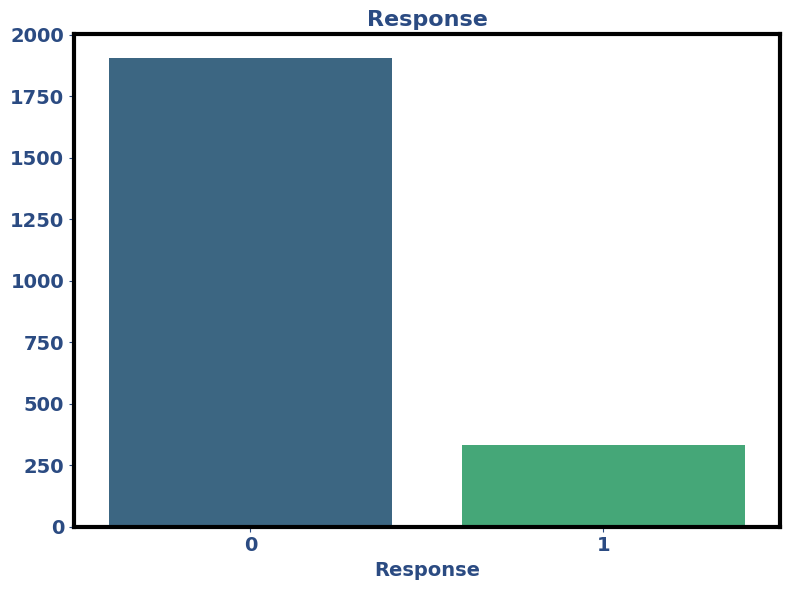

In [ ]:
#Response

# plt.figure(figsize=(8, 6))
# sns.countplot(data=df, x='Response', palette='viridis')

# plt.title('Response')
# plt.xlabel('Response')
# plt.ylabel('Count')
# # plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Response', palette='viridis')


# Ganti title
ax.set_title('Response', color='#2b4b82', fontweight='bold', fontsize=16)


# Ganti nama label
ax.set_xlabel('Response', color='#2b4b82', fontweight='bold', fontsize=14)
ax.set_ylabel('', color='#2b4b82', fontweight='bold', fontsize=14)



# Ganti tick labels ke bold
ax.tick_params(labelcolor='#2b4b82', labelsize=14, color='#2b4b82')

# Buat bingkai putih
# ax.spines['bottom'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['top'].set_color('white')

# Atur lebar bingkai
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

# Dapatkan ticks
xticks = ax.get_xticks()
yticks = ax.get_yticks()

# Buat bold ticks sumbu x
xticks_asli = ax.get_xticklabels()
ax.set_xticklabels(xticks_asli, fontweight='bold')

# Buat bold ticks sumbu y
yticks_asli = ax.get_yticklabels()

ax.set_yticklabels(yticks_asli, fontweight='bold')

# Simpan gambar
plt.tight_layout()

plt.show()

In [ ]:
# Membuat subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Mengatur layout subplot
plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

# Iterasi melalui kategori dan membuat bar chart
for i, cat in enumerate(cats):
    ax = axes.flatten()[i]
    # Menggunakan value_counts() dan sort_values() untuk mengurutkan berdasarkan jumlah
    df[cat].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(cat)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=0)  # Menambahkan labelrotation untuk membuat teks horizontal

# Menampilkan plot
plt.show()

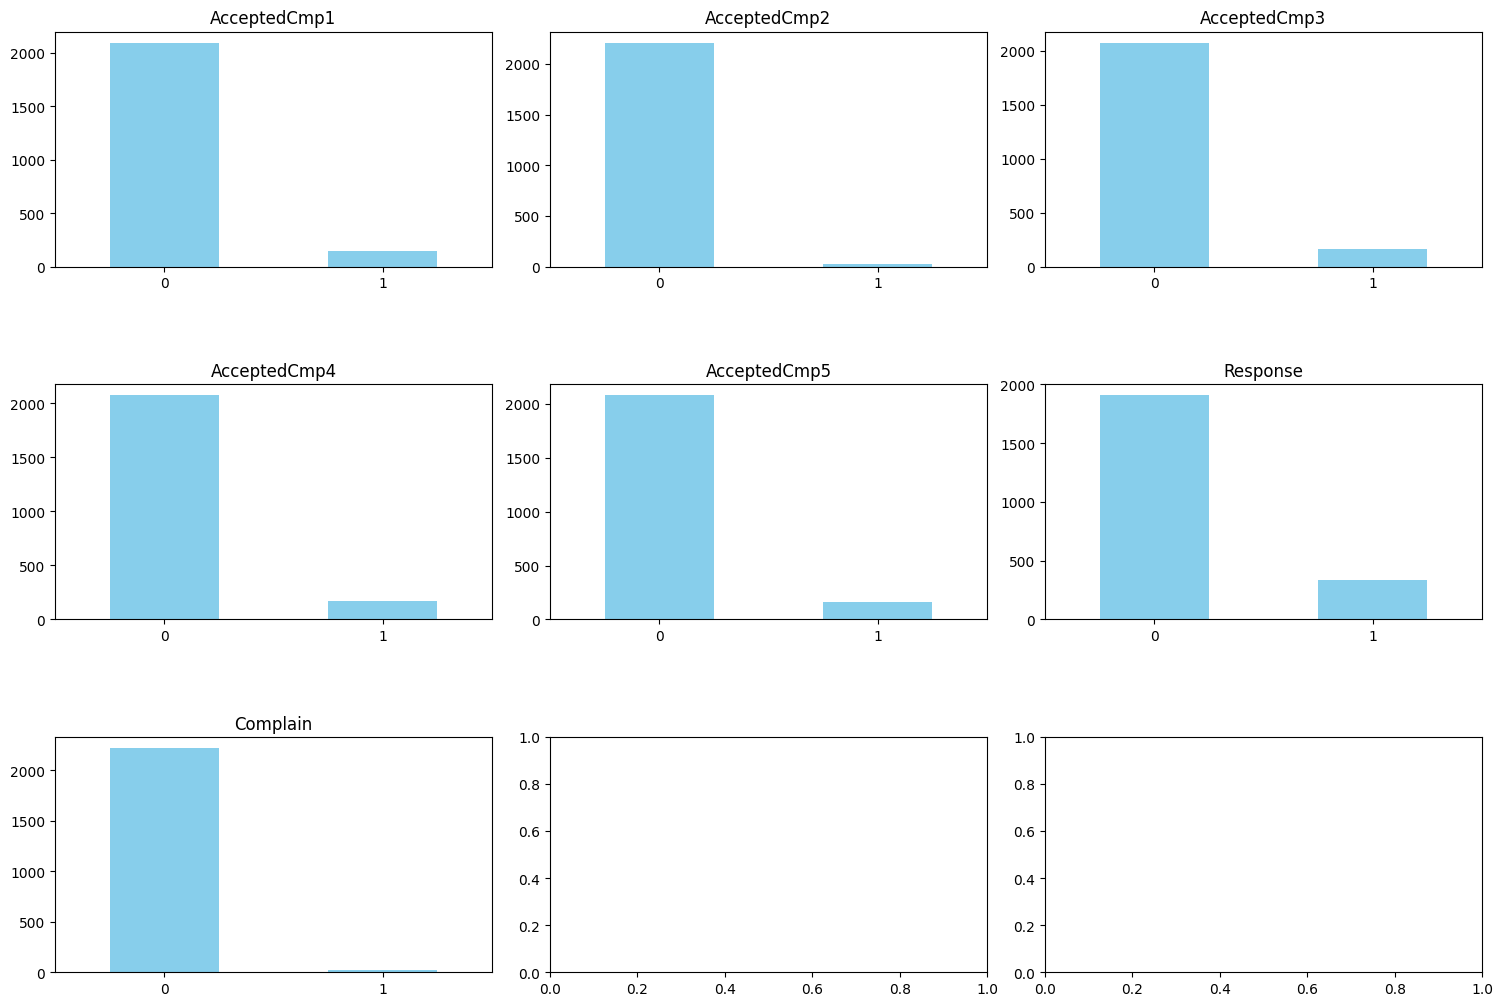

In [ ]:
# Membuat subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Mengatur layout subplot
plt.tight_layout()

plt.subplots_adjust(hspace=0.5)

# Iterasi melalui kategori dan membuat bar chart
for i, boolean in enumerate(booleans):
    ax = axes.flatten()[i]
    # Menggunakan value_counts() dan sort_values() untuk mengurutkan berdasarkan jumlah
    df[boolean].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(boolean)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=0)  # Menambahkan labelrotation untuk membuat teks horizontal

# Menampilkan plot
plt.show()

### Jawaban Nomor 2
* Terdapat outliers yang perlu dihilangkan.

* Nyaris pada seluruh categories pada Nums [Income, Amount of Wines,Fruit,Meat,Fish,Sweet,Gold,Deals Purchase,Web Purchase,Catalog Purchase,Store Purchase]
adalah positively skewed. Pada data ini berarti mean > median, dimana terdapat beberapa high values yang berada pada spektrum outliers.

* Untuk Recency merupakan bimodal, dimana berarti terdapat 2 modus yang tinggi.

* Untuk regency berdasarkan histogram, data tidak terlalu mengikuti distribusi normal. Hal ini bisa dijadikan identifikasi awal bahwa data kemungkinan tidak normal.

* Untuk Web Visit per Month adalah left skewed, dimana data berarti median > mean.

* Untuk pilihan YOLO, Alone, Absurd memiliki frekuensi yang sangat kecil sehingga bisa diperkirakan bahwa pilihan ini adalah outliers Categorical Married dan Together bisa dikategorikan sebagai sama. Begitu juga dengan widow dan divorced.







##3. Multivariate Analysis

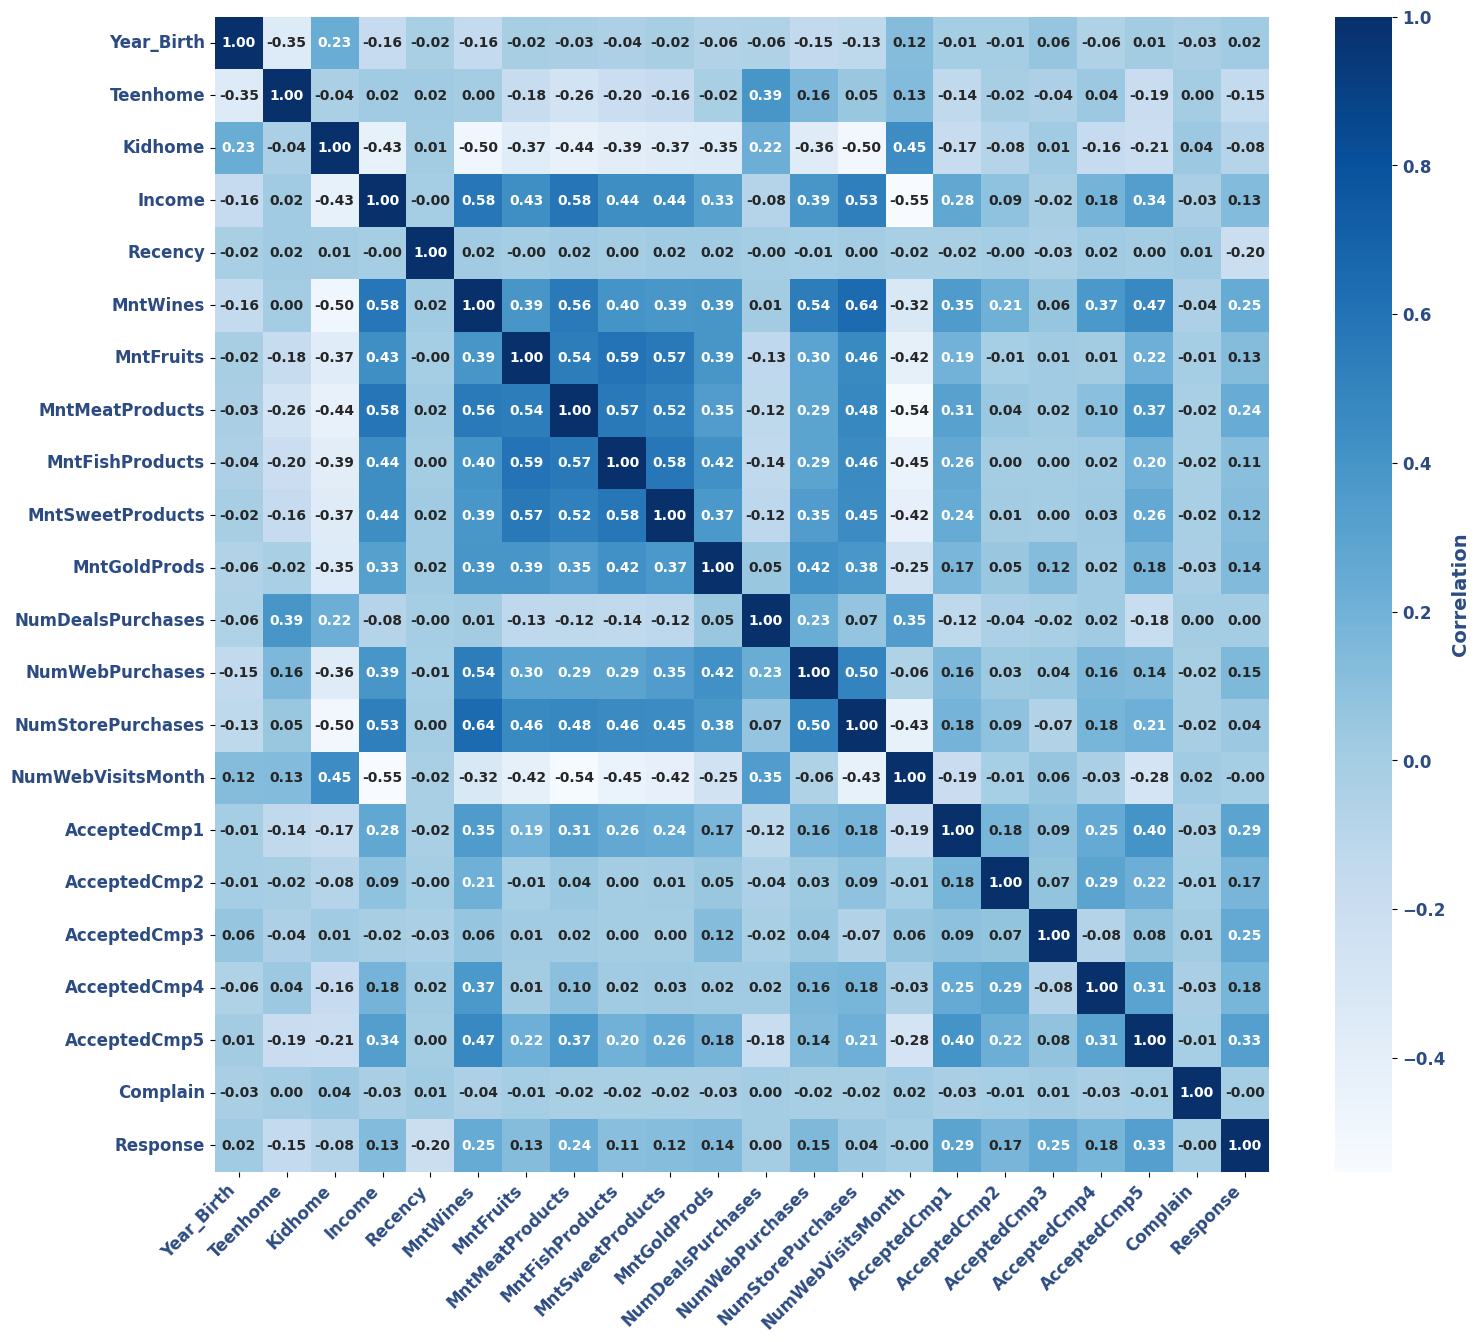

In [ ]:
corr_list = ['Year_Birth', 'Teenhome','Kidhome', 'Income',  'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain','Response']
plt.figure(figsize=(17, 15))
# sns.heatmap(df[corr_list].corr(),cmap='Blues',annot=True,fmt='.2f')
heatmap = sns.heatmap(df[corr_list].corr(), cmap='Blues', annot=True, fmt='.2f',
                      annot_kws={'size': 10, 'weight': 'bold'},
                      cbar_kws={'label': 'Correlation'})

heatmap.figure.axes[0].set_alpha(0)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', color='#2b4b82', fontweight='bold',fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, ha='right', color='#2b4b82', fontweight='bold',fontsize=12)

# Mendapatkan objek colorbar
cbar = heatmap.collections[0].colorbar

# Mengatur ukuran dan ketebalan label colorbar
cbar.set_label('Correlation', size=14, color='#2b4b82',weight='bold')

for text in cbar.ax.yaxis.get_ticklabels():
    text.set_weight('bold')
    text.set_size(12)
    text.set_color('#2b4b82')

plt.show()


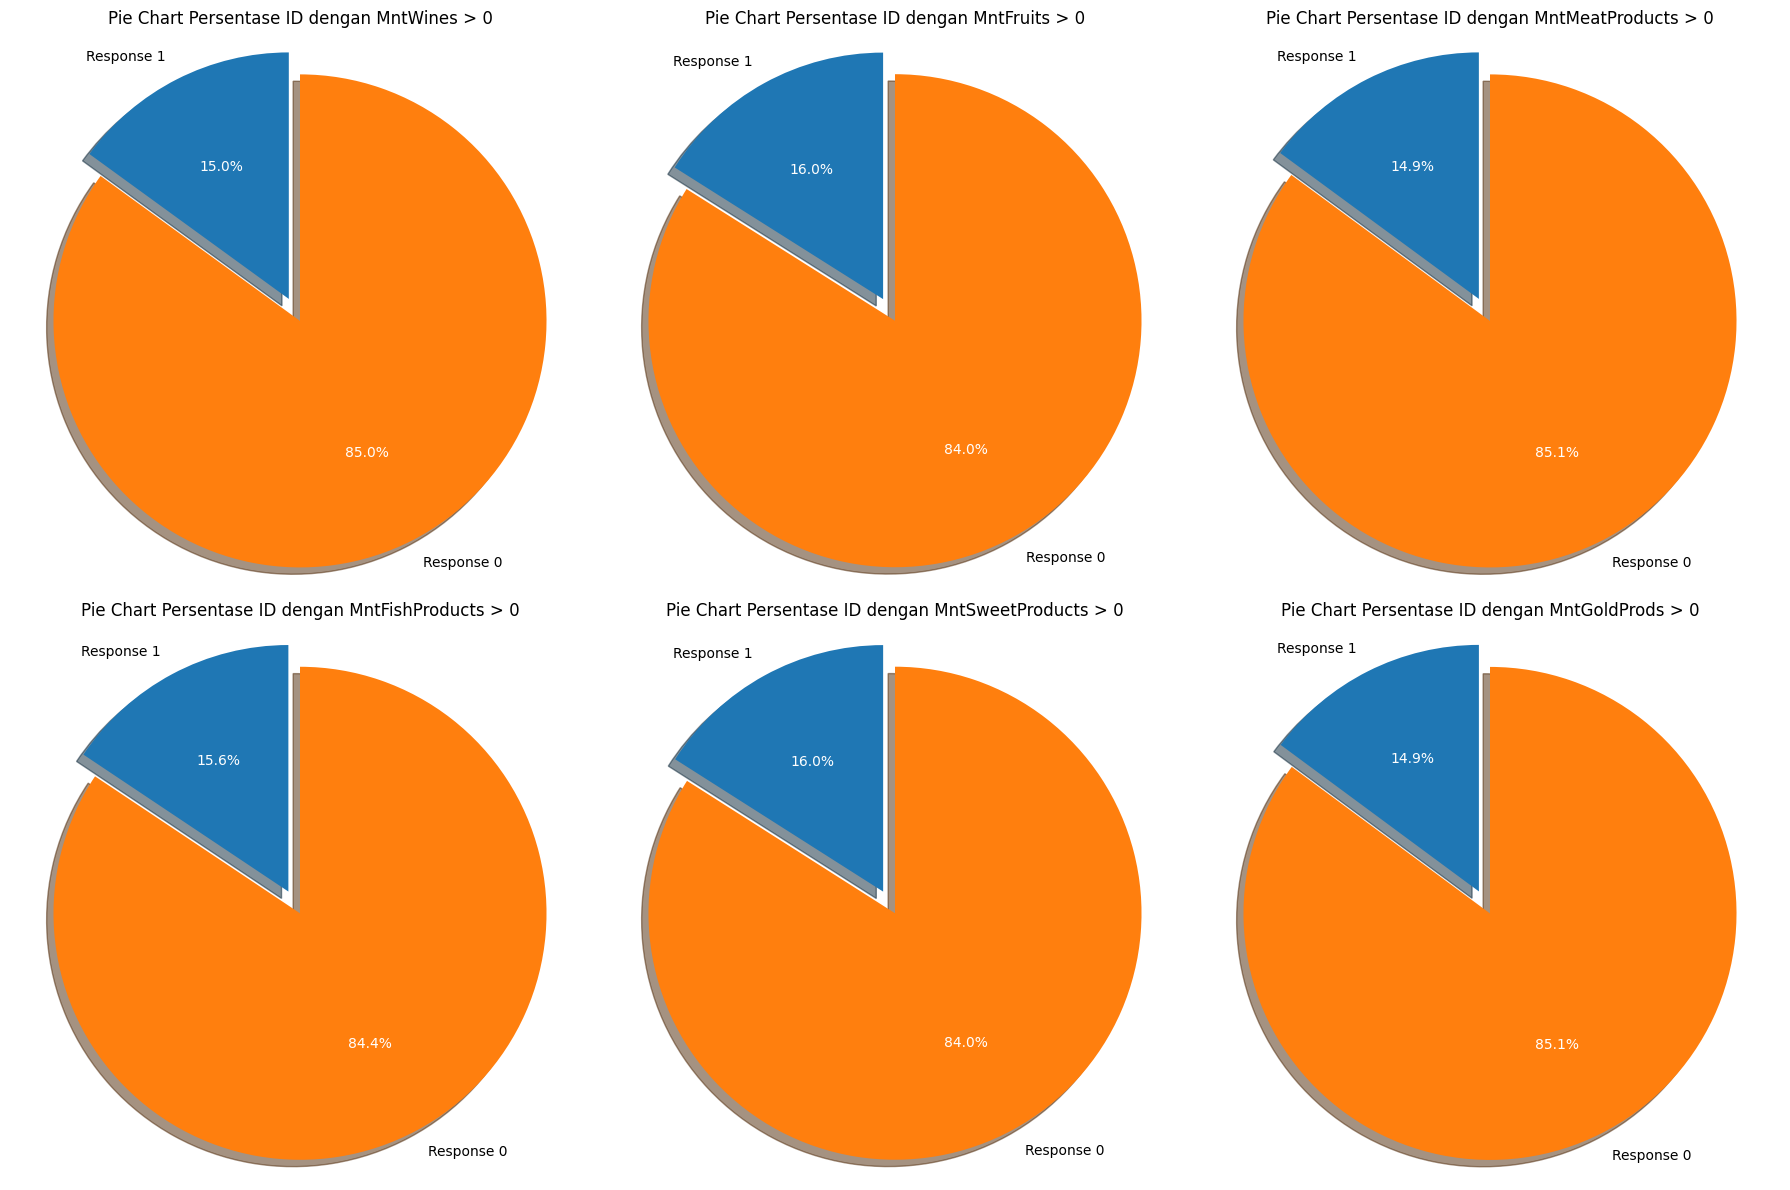

In [ ]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_response_1 = df[df['Response'] == 1]

# Filter dataframe untuk Response 0
df_response_0 = df[df['Response'] == 0]
# Hitung total jumlah ID
total_ids = len(df)

# Inisialisasi subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Loop untuk setiap kolom
for i, column in enumerate(columns_to_plot):
    # Hitung jumlah ID yang nilai kolom > 0 untuk setiap kelompok
    count_response_1 = (df_response_1[column] > 0).sum()
    count_response_0 = (df_response_0[column] > 0).sum()

    # Hitung persentase dari jumlah ID yang nilai kolom > 1
    percentage_response_1 = count_response_1 / total_ids * 100
    percentage_response_0 = count_response_0 / total_ids * 100

    # Plot pie chart
    explode = (0.1, 0)  # Untuk memberi efek slice terpisah
    pie_chart = axes[i].pie([percentage_response_1, percentage_response_0], labels=['Response 1', 'Response 0'], autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

    # Ubah warna teks persentase menjadi putih
    for text in pie_chart[2]:
        text.set_color('white')

    # Tambahkan label dan judul
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].set_title(f'Pie Chart Persentase ID dengan {column} > 0')

# Tampilkan plot
plt.tight_layout()
plt.show()

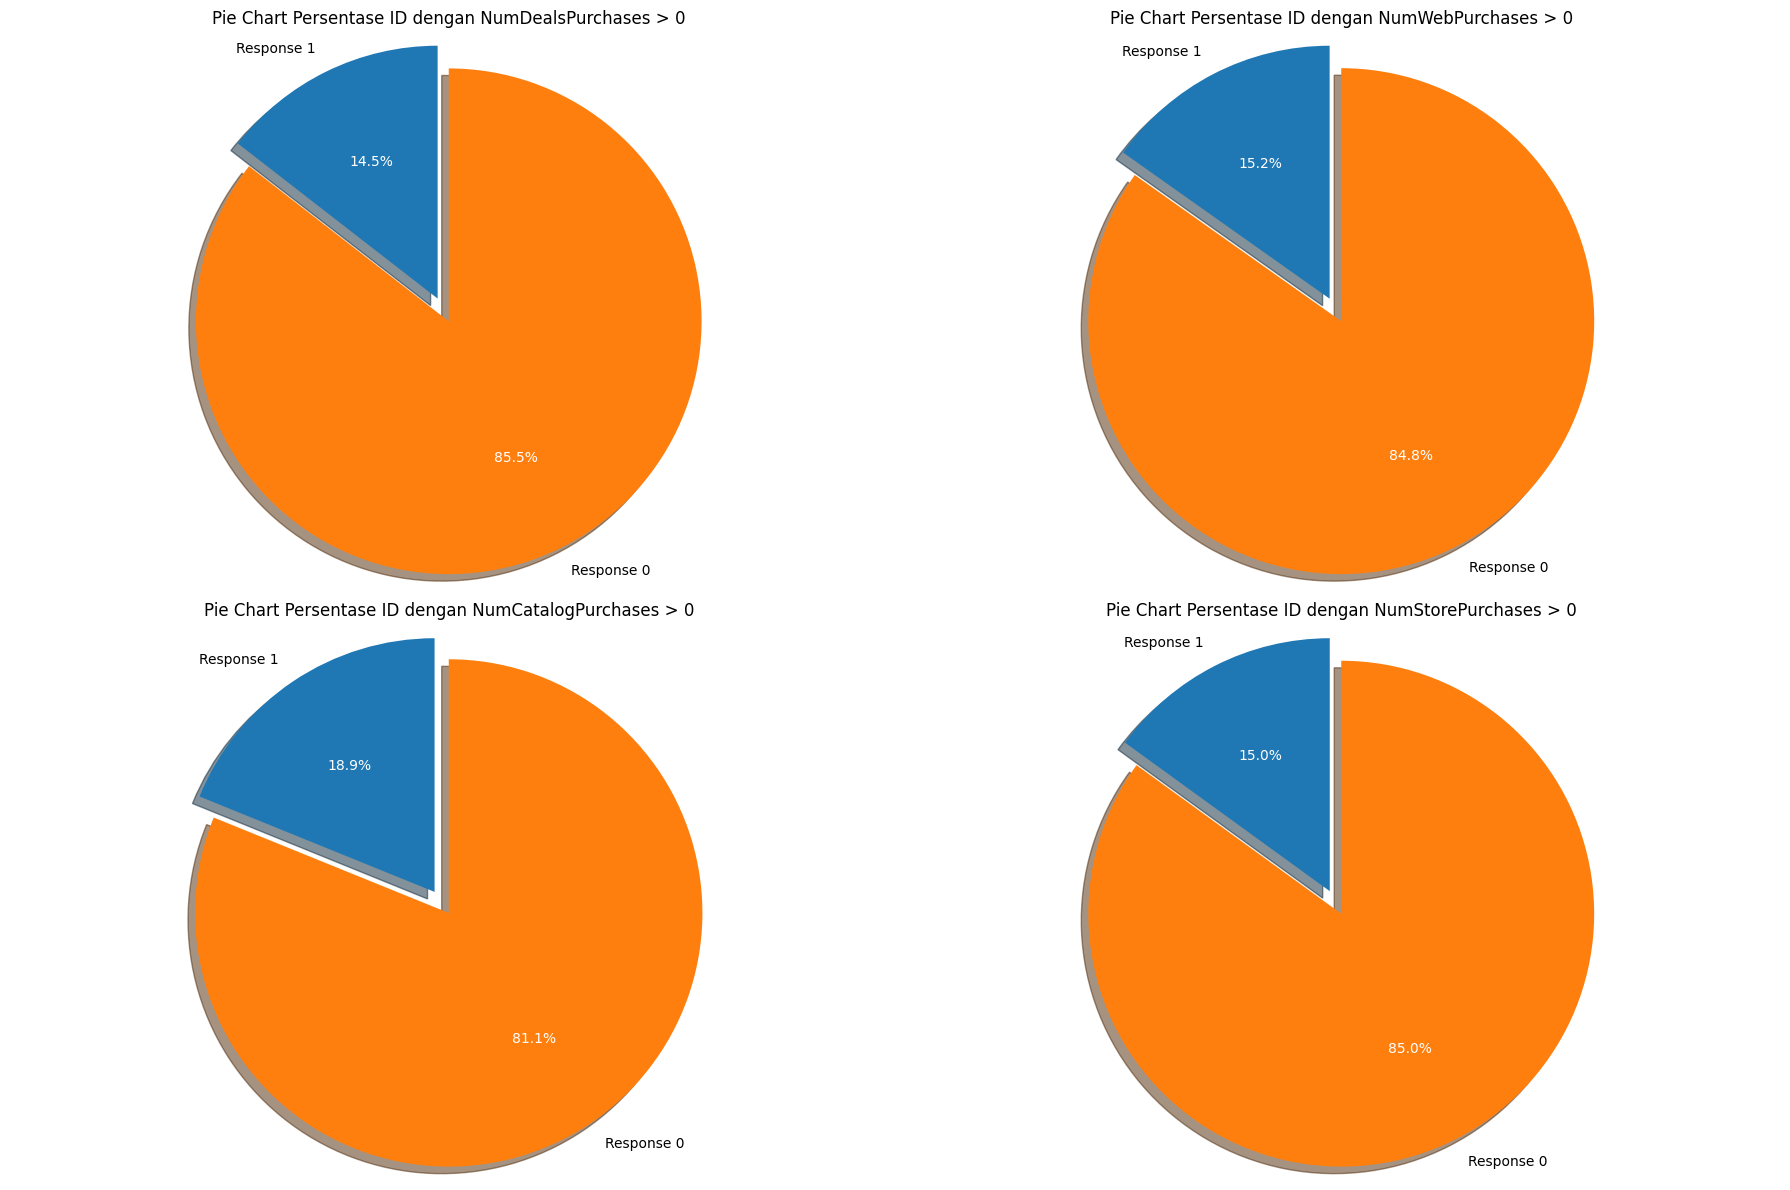

In [ ]:
columns_to_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_response_1 = df[df['Response'] == 1]

# Filter dataframe untuk Response 0
df_response_0 = df[df['Response'] == 0]
# Hitung total jumlah ID
total_ids = len(df)

# Inisialisasi subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Loop untuk setiap kolom
for i, column in enumerate(columns_to_plot):
    # Hitung jumlah ID yang nilai kolom > 0 untuk setiap kelompok
    count_response_1 = (df_response_1[column] > 0).sum()
    count_response_0 = (df_response_0[column] > 0).sum()

    # Hitung persentase dari jumlah ID yang nilai kolom > 1
    percentage_response_1 = count_response_1 / total_ids * 100
    percentage_response_0 = count_response_0 / total_ids * 100

    # Plot pie chart
    explode = (0.1, 0)  # Untuk memberi efek slice terpisah
    pie_chart = axes[i].pie([percentage_response_1, percentage_response_0], labels=['Response 1', 'Response 0'], autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

    # Ubah warna teks persentase menjadi putih
    for text in pie_chart[2]:
        text.set_color('white')

    # Tambahkan label dan judul
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].set_title(f'Pie Chart Persentase ID dengan {column} > 0')

# Tampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-144-06a37b5df06b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Income', y='Marital_Status', data=df1, jitter=True, palette='Set1')


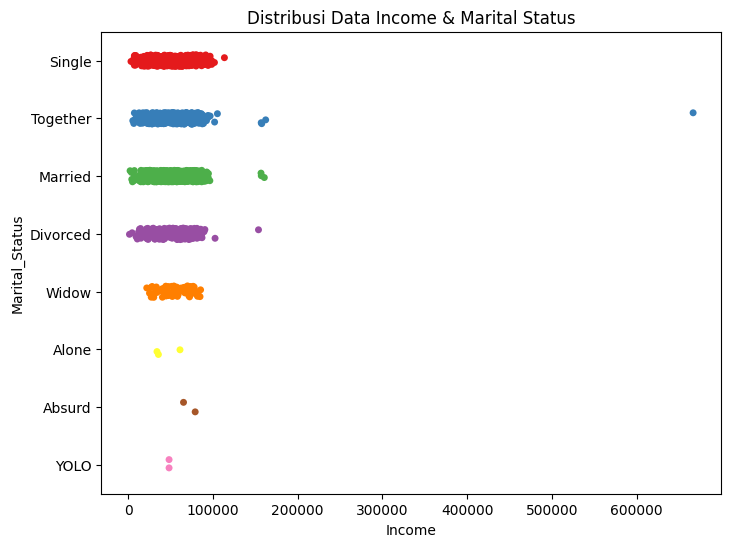

In [ ]:
df1 = pd.DataFrame(df)

plt.figure(figsize=(8, 6))
sns.stripplot(x='Income', y='Marital_Status', data=df1, jitter=True, palette='Set1')
plt.title('Distribusi Data Income & Marital Status')
plt.show()

In [ ]:
mapping_reponse = {0:'Ditolak',
                   1:'Diterima'}
df_multi_cat = df.copy()
df_multi_cat['Response'] = df_multi_cat['Response'].map(mapping_reponse)

order_reponse = ['Ditolak','Diterima']
# custom_palette = ["#277DA1", "#4D908E", "#43AA8B", "#90BE6D", "#F9C74F", "#F9844A", "#F8961E", "#F3722C", "#F94144"]
custom_palette = ["#31356E", "#F59C2F"]
# custom_palette = 'viridis'

<ipython-input-146-708fb79ab043>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_asli, color='#2b4b82', fontweight='bold')
<ipython-input-146-708fb79ab043>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_asli, color='#2b4b82', fontweight='bold')
<ipython-input-146-708fb79ab043>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_asli, color='#2b4b82', fontweight='bold')
<ipython-input-146-708fb79ab043>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_asli, color='#2b4b82', fontweight='bold')


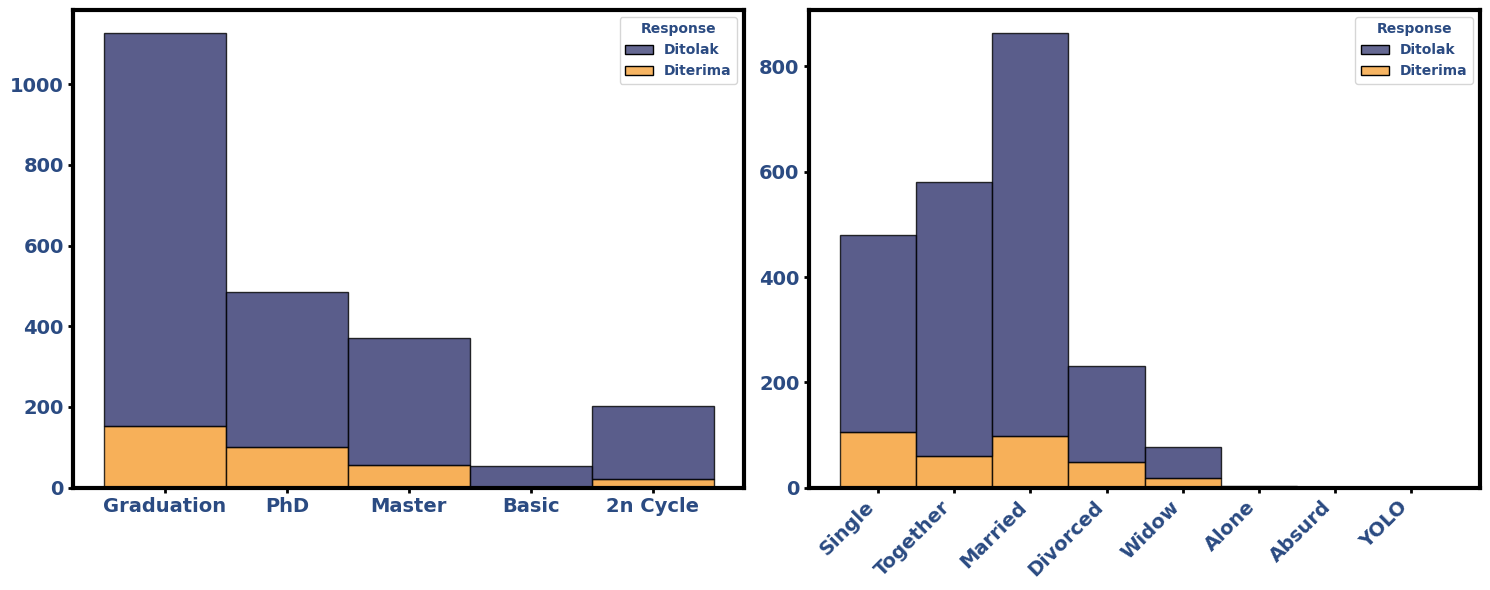

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for cat, ax in zip(cats, axes.flatten()):
    sns.histplot(x=cat, data=df_multi_cat, hue='Response', multiple='stack', bins=30, ax=ax, palette=custom_palette, hue_order=order_reponse)  # Hapus kde=True

    # Buat plot transparan:
    fig.patch.set_alpha(0.0)
    # Hapus Grid
    ax.grid(False)

    # Besar font
    ax.tick_params(labelsize=14)

    # Tebal garis sumbu
    ax.tick_params(axis='both', which='major', labelsize=14, width=2)

    # Ganti nama label
    ax.set_xlabel('', color='#2b4b82', fontweight='bold', fontsize=13)
    ax.set_ylabel('', color='#2b4b82', fontweight='bold', fontsize=13)

    # Dapatkan ticks
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()

    # Buat bold ticks sumbu x
    plt.xticks(rotation=45, ha='right')
    xticks_asli = ax.get_xticklabels()
    ax.set_xticklabels(xticks_asli, color='#2b4b82', fontweight='bold')

    # Buat bold ticks sumbu y
    yticks_asli = ax.get_yticklabels()
    ax.set_yticklabels(yticks_asli, color='#2b4b82', fontweight='bold')

    legend = ax.get_legend()
    for text in legend.get_texts():
        text.set_fontweight('bold')
        text.set_color('#2b4b82')  # Sesuaikan warna font

    # Modifikasi tulisan Response:
    title = legend.get_title()
    title.set_fontweight('bold')  # Gunakan set_fontweight() pada title object
    title.set_color('#2b4b82')

    # Atur lebar bingkai
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)

    for patch in ax.patches:
        patch.set_alpha(0.8)  # Set transparency for bar

plt.tight_layout()

plt.show()

<ipython-input-147-6b5422c80f1c>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_asli, fontweight='bold')
<ipython-input-147-6b5422c80f1c>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_asli, fontweight='bold')


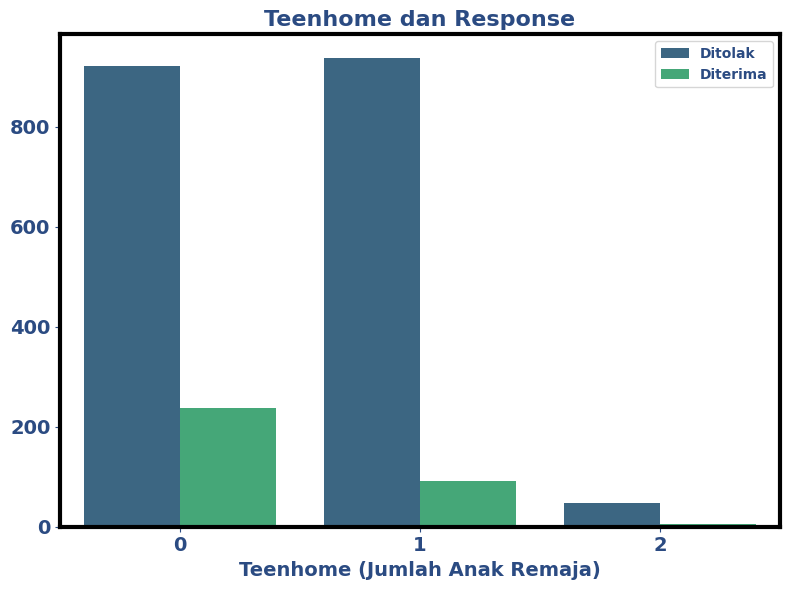

In [ ]:
df_teens = df.copy()

mapping_reponse = {0:'Ditolak',
                     1:'Diterima'}
df_teens['Response'] = df_teens['Response'].map(mapping_reponse)

order_reponse = ['Ditolak','Diterima']

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_teens, x='Teenhome', hue='Response', palette='viridis',hue_order=order_reponse)

# Ganti title
ax.set_title('Teenhome dan Response', color='#2b4b82', fontweight='bold', fontsize=16)

# Ganti nama label
ax.set_xlabel('Teenhome (Jumlah Anak Remaja)', color='#2b4b82', fontweight='bold', fontsize=14)
ax.set_ylabel('', color='#2b4b82', fontweight='bold', fontsize=14)

# Ganti legend
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=14,
           labelcolor='#2b4b82', facecolor='white', frameon=True, edgecolor='#2b4b82')

legend = plt.legend()

# Buat legend bold
legend.texts[0].set_fontweight('bold')
legend.texts[1].set_fontweight('bold')

#Warna legend
legend.texts[0].set_color('#2b4b82')
legend.texts[1].set_color('#2b4b82')

# Ganti tick labels ke bold
ax.tick_params(labelcolor='#2b4b82', labelsize=14, color='#2b4b82')

# Atur lebar bingkai
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

# Dapatkan ticks
xticks = ax.get_xticks()
yticks = ax.get_yticks()

# Buat bold ticks sumbu x
xticks_asli = ax.get_xticklabels()
ax.set_xticklabels(xticks_asli, fontweight='bold')

# Buat bold ticks sumbu y
yticks_asli = ax.get_yticklabels()
ax.set_yticklabels(yticks_asli, fontweight='bold')

# Simpan gambar
plt.tight_layout()

plt.show()

<ipython-input-148-b2529eeb5043>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, fontweight='bold')
<ipython-input-148-b2529eeb5043>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks_asli, fontweight='bold')


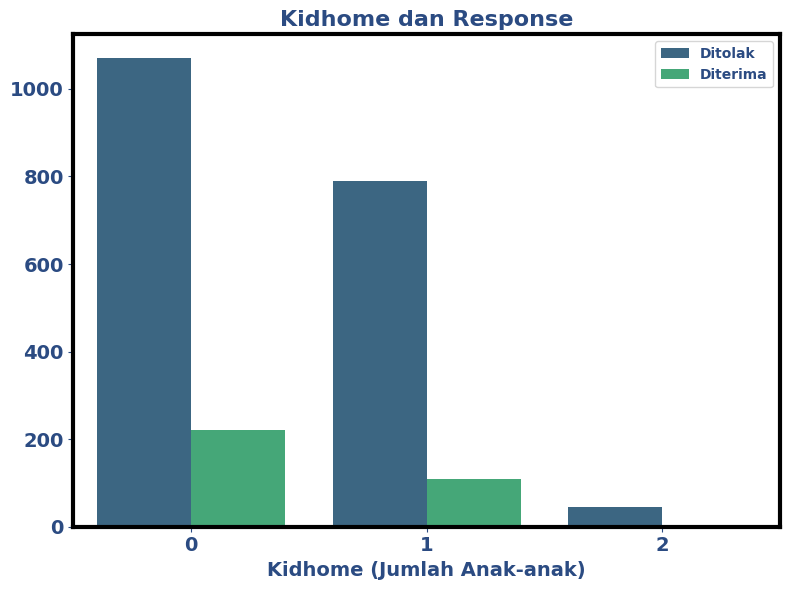

In [ ]:
df_teens = df.copy()

mapping_reponse = {0:'Ditolak',
                     1:'Diterima'}
df_teens['Response'] = df_teens['Response'].map(mapping_reponse)

order_reponse = ['Ditolak','Diterima']

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_teens, x='Kidhome', hue='Response', palette='viridis',hue_order=order_reponse)

# Ganti title
ax.set_title('Kidhome dan Response', color='#2b4b82', fontweight='bold', fontsize=16)

# Ganti nama label
ax.set_xlabel('Kidhome (Jumlah Anak-anak)', color='#2b4b82', fontweight='bold', fontsize=14)
ax.set_ylabel('', color='#2b4b82', fontweight='bold', fontsize=14)

# Ganti legend
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=14,
           labelcolor='#2b4b82', facecolor='white', frameon=True, edgecolor='#2b4b82')

legend = plt.legend()

# Buat legend bold
legend.texts[0].set_fontweight('bold')
legend.texts[1].set_fontweight('bold')

#Warna legend
legend.texts[0].set_color('#2b4b82')
legend.texts[1].set_color('#2b4b82')

# Ganti tick labels ke bold
ax.tick_params(labelcolor='#2b4b82', labelsize=14, color='#2b4b82')

# Atur lebar bingkai
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

# Dapatkan ticks
xticks = ax.get_xticks()
yticks = ax.get_yticks()

# Buat bold ticks sumbu x
ax.set_xticklabels(xticks, fontweight='bold')

# Buat bold ticks sumbu y
yticks_asli = ax.get_yticklabels()
ax.set_yticklabels(yticks_asli, fontweight='bold')

# Simpan gambar
plt.tight_layout()

plt.show()

<ol>
  <li>Berdasarkan data analisa korelasi heatmap , terdapat beberapa variabel yang berkorelasi positif sedang terhadap respons yaitu: acceptcmp5 0.33. Hasil tersebut dapat diinterpresatikan semakin banyak respon positif maka semakin besar acceptcmp nya semakin tinggi
  </li>
 <br>
  <li>
  <ul>
    <li>Korelasi antara MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts memiliki nilai diatas 0.5 hal ini menunjukan bahwa jika seseorang membeli salah satu produk diatas akan membeli juga 3 lainnya.</li>
    <li>Korelasi antara NumWebVisitsMonth dan produk-produk yang bisa dibeli semuanya negatif hal ini menunjukkan bahwa semakin banyak orang mengunjungi web tidak berarti akan membeli
    </li>
  </ul>
  </li>
</ol>

##4. Business Insight

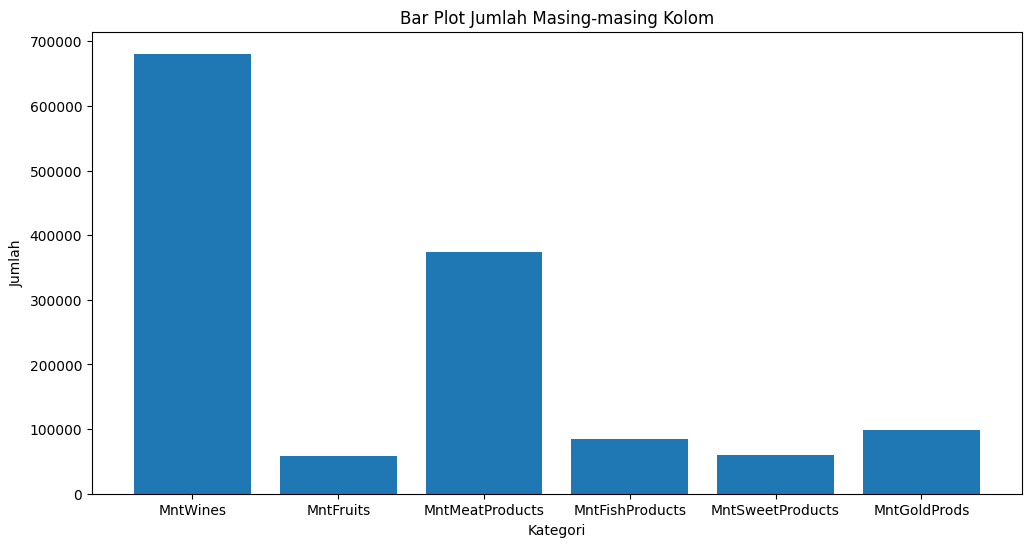

In [ ]:
mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(12, 6))
# Menghitung total masing-masing kolom
total_mnt = df[mnt].sum()

# Membuat bar plot
plt.bar(total_mnt.index, total_mnt.values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Plot Jumlah Masing-masing Kolom')
plt.show()

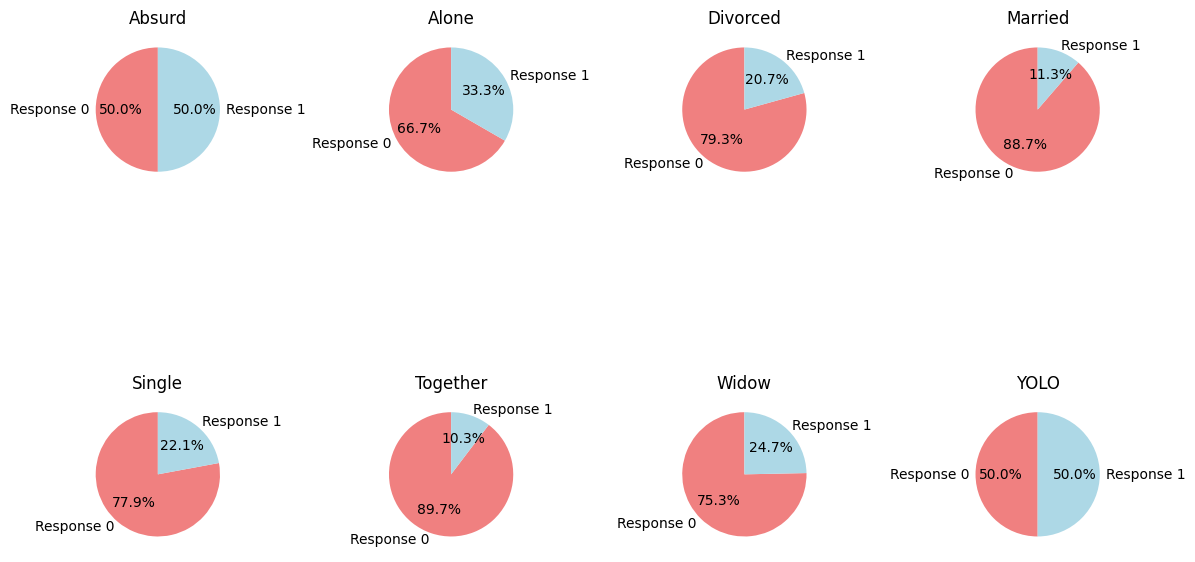

In [ ]:
# Membuat pivot table untuk mendapatkan jumlah respons 1 dan 0 untuk setiap kategori marital status
pivot_table = pd.pivot_table(df, values='ID', index='Marital_Status', columns='Response', aggfunc='count', fill_value=0)

# Mendapatkan daftar kategori marital status
categories = pivot_table.index

# Membuat subplot dengan dua baris
fig, axes = plt.subplots(nrows=2, ncols=len(categories)//2, figsize=(12, 8))

# Melakukan plotting untuk setiap kategori
for i, category in enumerate(categories):
    row = i // (len(categories)//2)
    col = i % (len(categories)//2)

    # Mendapatkan data untuk pie chart
    response_0 = pivot_table.loc[category, 0]
    response_1 = pivot_table.loc[category, 1]

    # Membuat pie chart di subplot yang sesuai
    axes[row, col].pie([response_0, response_1], labels=['Response 0', 'Response 1'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'], labeldistance=1.1)
    axes[row, col].set_title(f'{category}')

# Menampilkan gambar
plt.tight_layout()
plt.show()

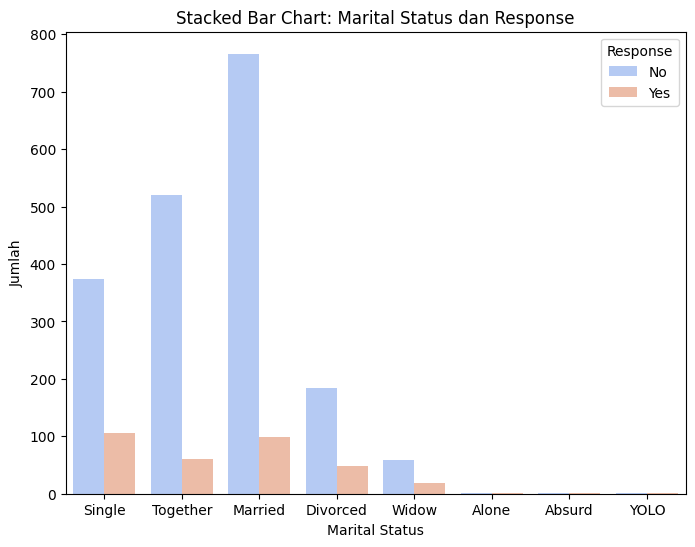

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', hue='Response', data=df, palette='coolwarm')
plt.title('Stacked Bar Chart: Marital Status dan Response')
plt.xlabel('Marital Status')
plt.ylabel('Jumlah')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()


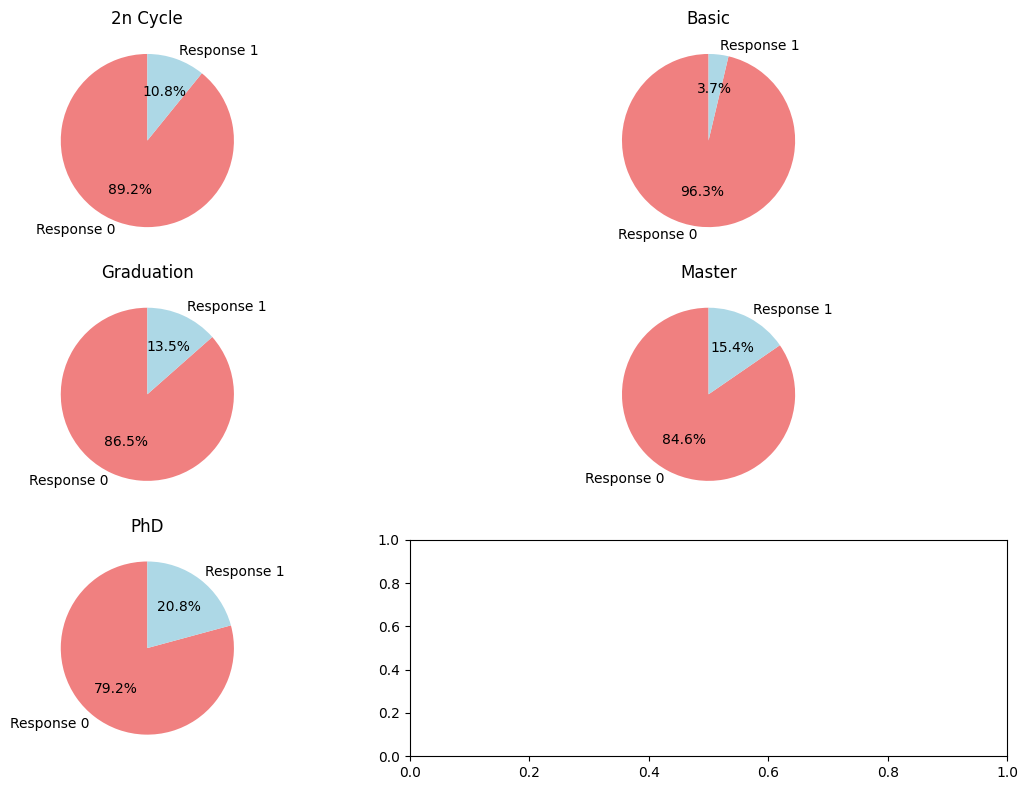

In [ ]:
# Membuat pivot table untuk mendapatkan jumlah respons 1 dan 0 untuk setiap kategori marital status
pivot_table = pd.pivot_table(df, values='ID', index='Education', columns='Response', aggfunc='count', fill_value=0)

# Mendapatkan daftar kategori marital status
categories = pivot_table.index

# Membuat subplot dengan dua baris
fig, axes = plt.subplots(nrows=3, ncols=len(categories)//2, figsize=(12, 8))

# Melakukan plotting untuk setiap kategori
for i, category in enumerate(categories):
    row = i // (len(categories)//2)
    col = i % (len(categories)//2)

    # Mendapatkan data untuk pie chart
    response_0 = pivot_table.loc[category, 0]
    response_1 = pivot_table.loc[category, 1]

    # Membuat pie chart di subplot yang sesuai
    axes[row, col].pie([response_0, response_1], labels=['Response 0', 'Response 1'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'], labeldistance=1.1)
    axes[row, col].set_title(f'{category}')

# Menampilkan gambar
plt.tight_layout()
plt.show()

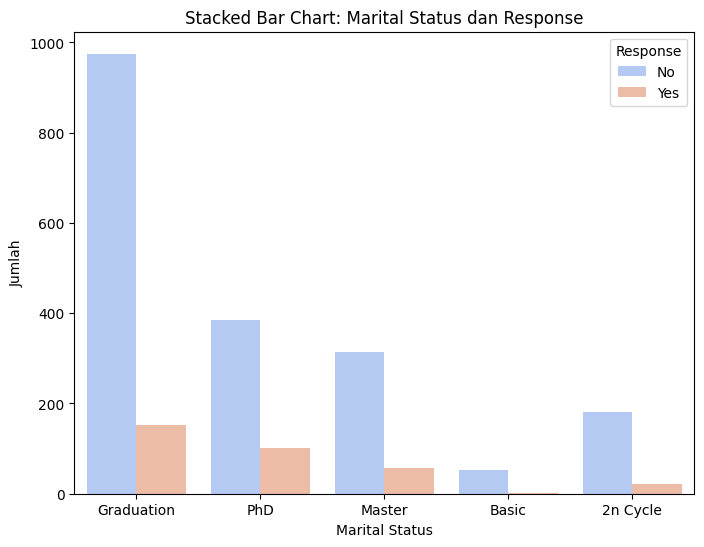

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Response', data=df, palette='coolwarm')
plt.title('Stacked Bar Chart: Marital Status dan Response')
plt.xlabel('Marital Status')
plt.ylabel('Jumlah')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()


<ipython-input-154-c37409b58713>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Marital_Status').sum()


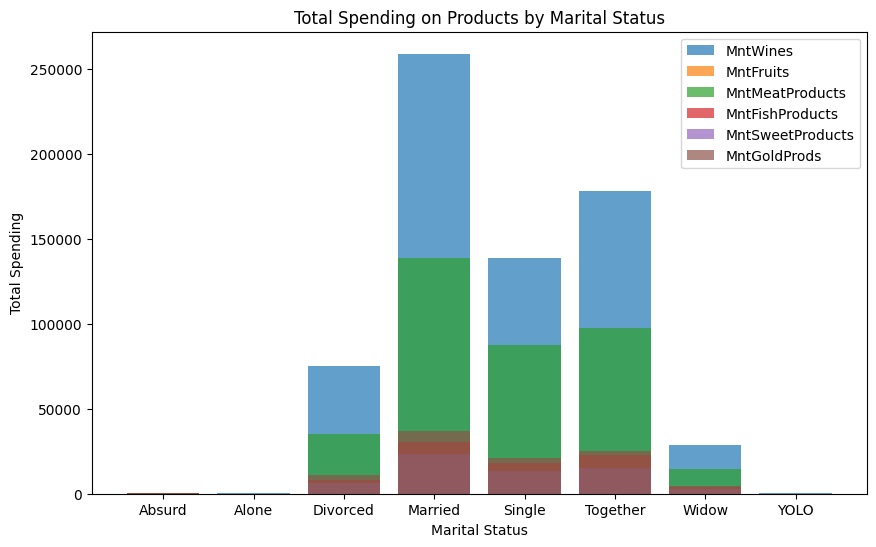

In [ ]:
# Mengelompokkan data berdasarkan status pernikahan
grouped_data = df.groupby('Marital_Status').sum()

# Membuat stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting untuk setiap jenis produk
for product in products:
    ax.bar(grouped_data.index, grouped_data[product], label=product, alpha=0.7)

# Menambahkan label dan judul
ax.set_xlabel('Marital Status')
ax.set_ylabel('Total Spending')
ax.set_title('Total Spending on Products by Marital Status')

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.show()

    

1.   Pada data korelasi pembelian pada toko terbanyak pada kategori wines, produk yang paling banyak dibeli juga adalah wines. Sehingga stok harus selalu dipastikan tersedia.
2.   Dari marital status jika kita mengesampingkan alone, absurd, dan YOLO yang diperkirakan adalah outliers, kategori widow memiliki persentase terbesar yaitu 24,7% terhadap response. Disarankan untuk campaign selanjutnya untuk menargetkan pelanggan dengan status Widow untuk efesiensi
3. Dari Education kategori PhD memiliki persentase terbesar yaitu 20,8% terhadap response. Disarankan untuk campaign selanjutnya untuk menargetkan pelanggan dengan tingkat pendidikan PhD untuk efesiensi


    

#Stage 2

## 1. Data Cleansing

### A. Handle missing values


In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df = df.dropna()
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Bisa dilihat dari EDA kalau jumlah missing value hanya 24 tidak sampai 2% dari



keseluruhan data, maka dari itu missing value bisa didrop


### B. Handle duplicated data


Tidak ada data duplikat

### D. Feature transformation (1)

####Kategorikal


Mengubah value Education, dan Marital status

Rubah semua value menjadi huruf kecil agar mudah diolah

In [ ]:
df['Marital_Status'] = df['Marital_Status'].str.lower()
df['Education'] = df['Education'].str.lower()
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

married     857
together    573
single      471
divorced    232
widow        76
alone         3
absurd        2
yolo          2
Name: Marital_Status, dtype: int64
graduation    1116
phd            481
master         365
2n cycle       200
basic           54
Name: Education, dtype: int64


<ipython-input-157-53e3ac7361eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].str.lower()
<ipython-input-157-53e3ac7361eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].str.lower()


Marital status disederhanakan menjadi dua kategori berdasarkan customer tinggal sendiri atau dengan orang lain

In [ ]:
single = ['divorced','widow','alone']
together = ['married']

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'single' if x in single else x)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'together' if x in together else x)

df['Marital_Status'].value_counts()

<ipython-input-158-5e8fe39a773b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'single' if x in single else x)
<ipython-input-158-5e8fe39a773b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'together' if x in together else x)


together    1430
single       782
absurd         2
yolo           2
Name: Marital_Status, dtype: int64

Kalau kita lihat data diatas feature marital status yang memiliki value absurd dan yolo hanya 4 row dan tidak terlalu mempengaruhi data maka dari itu row akan di drop

In [ ]:
df = df[df['Marital_Status'].isin(['together', 'single'])]

In [ ]:
df['Education'] = df['Education'].replace('2n cycle', 'master')
df['Education'].value_counts()

graduation    1115
master         564
phd            479
basic           54
Name: Education, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

### E. Feature encoding


In [ ]:
mapping_education = {'basic':0,
                     'graduation':1,
                     'master':2,
                     'phd':3}
df['Education'] = df['Education'].map(mapping_education)

In [ ]:
df['Education'].value_counts()

1    1115
2     564
3     479
0      54
Name: Education, dtype: int64

In [ ]:
dummy_marital = pd.get_dummies(df['Marital_Status'], prefix='Marital')

In [ ]:
df = pd.concat([df, dummy_marital], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   int64  
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

###Split data train dan data test

In [ ]:
feature = ['Year_Birth', 'Education', 'Marital_Status','Income', 'Kidhome', 'Teenhome',
    'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Marital_single', 'Marital_together']
target = ['Response']

x = df[feature]
y = df[target]

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [ ]:
df_train  = pd.concat([X_train, y_train], axis=1)
df_train.shape[0]

1548

### C. Handle outliers


In [ ]:
def handle_outliers_with_iqr(dataframe, columns):
    df_copy = dataframe.copy()

    for column in columns:
        # Menghitung Q1 dan Q3
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)

        # Menghitung IQR (Interquartile Range)
        iqr = q3 - q1

        # Menentukan batas bawah dan batas atas untuk outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Hapus baris dengan nilai di luar batas bawah atau batas atas
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]

    return df_copy

In [ ]:
def handle_outliers_with_z_score(dataframe, columns, threshold=3):
    df_copy = dataframe.copy()

    for column in columns:
        # Calculate Z-Score for each value in the column
        z_scores = (df_copy[column] - df_copy[column].mean()) / df_copy[column].std()

        # Identify and remove rows with Z-Score beyond the specified threshold
        df_copy = df_copy[abs(z_scores) <= threshold]

    return df_copy

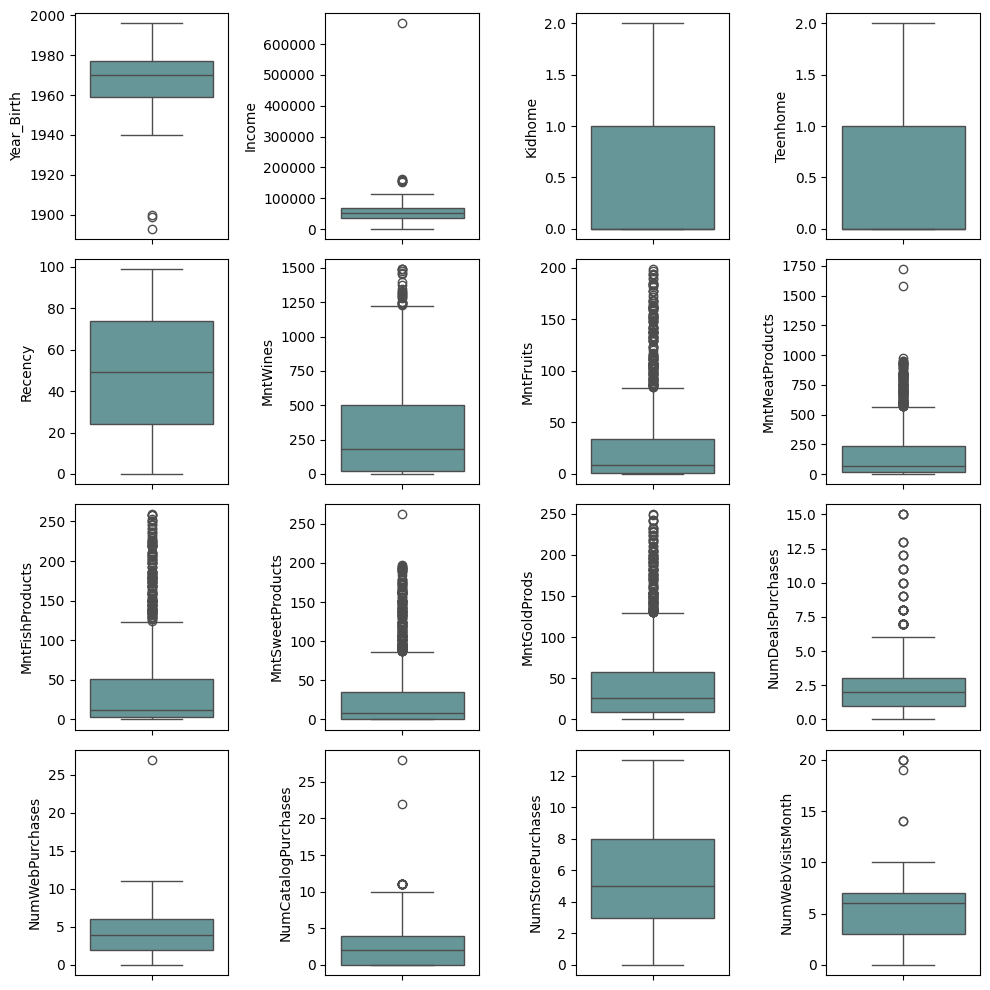

In [ ]:
nums =['Year_Birth','Income', 'Kidhome', 'Teenhome',
       'Recency','MntWines','MntFruits','MntMeatProducts',
       'MntFishProducts','MntSweetProducts','MntGoldProds',
       'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
       'NumStorePurchases','NumWebVisitsMonth']

plt.figure (figsize=(10,10))
for i in range (0, len(nums)):
  plt.subplot (4,4,i+1)
  sns.boxplot(y=df_train[nums[i]],color = 'cadetblue',orient ='v')
  plt.tight_layout()

In [ ]:
df_train.shape[0]

1548

In [ ]:
filter_list = ['Year_Birth','Recency','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth']
# df_train = handle_outliers_with_z_score(df_train, filter_list, 3)
df_train = handle_outliers_with_z_score(df_train, filter_list, 3.39)

In [ ]:
df_train.shape[0]

1392

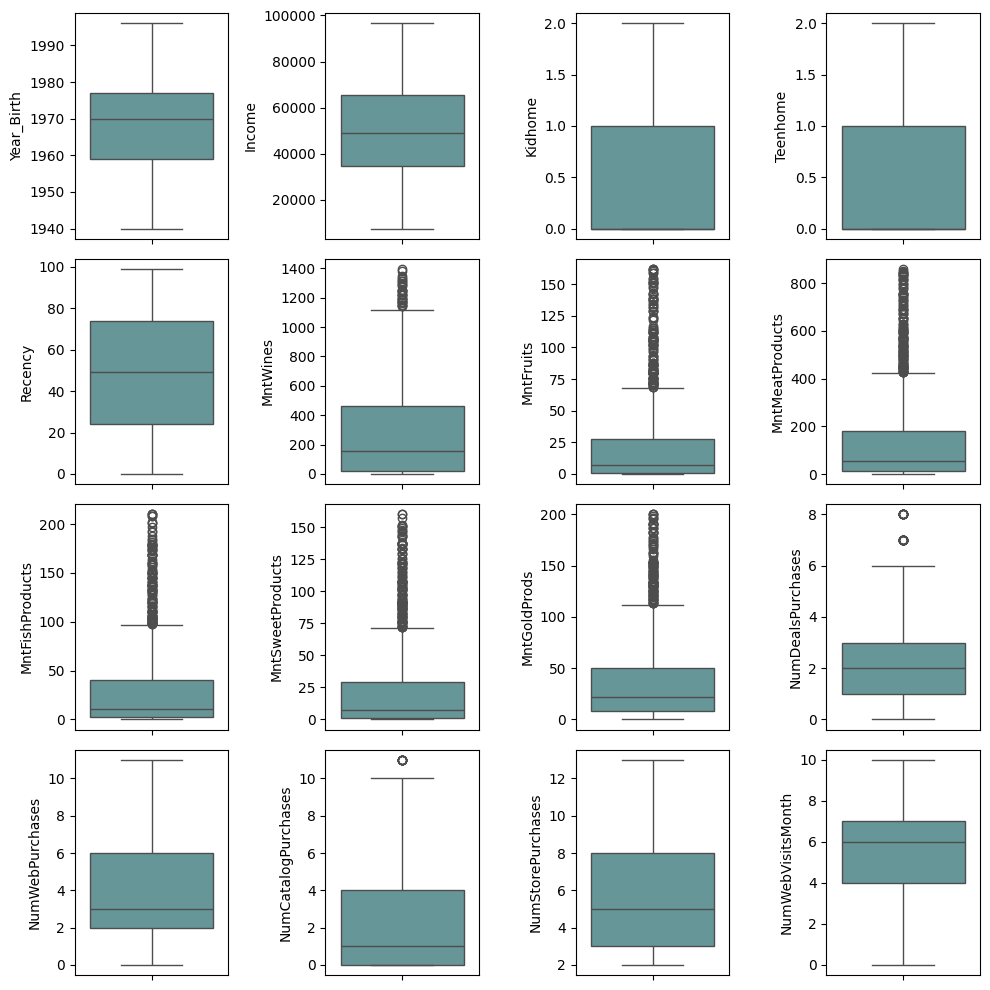

In [ ]:
plt.figure (figsize=(10,10))
for i in range (0, len(nums)):
  plt.subplot (4,4,i+1)
  sns.boxplot(y=df_train[nums[i]],color = 'cadetblue',orient ='v')
  plt.tight_layout()

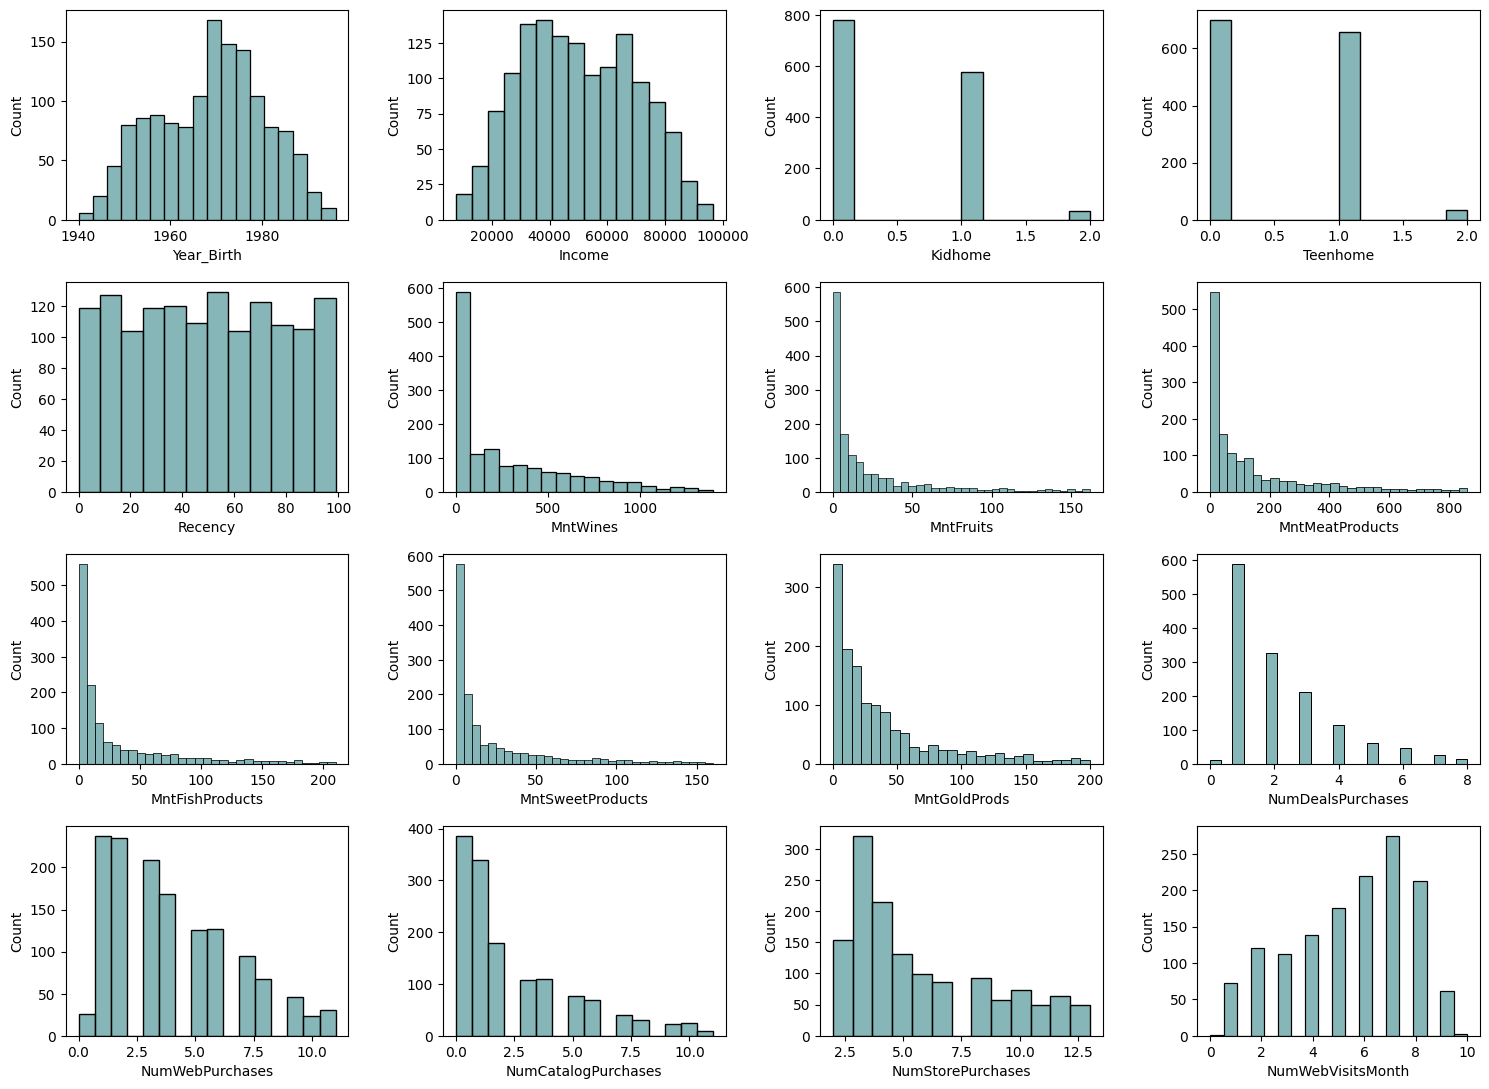

In [ ]:
plt.figure(figsize=(15,11))
for i in range (0,len(nums)):
  plt.subplot (4,4,i+1)
  sns.histplot(df_train[nums[i]],color ='cadetblue')
plt.tight_layout()

### 2 B. Feature extraction (membuat feature baru dari feature yang sudah ada)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 597 to 873
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1392 non-null   int64  
 1   Education            1392 non-null   int64  
 2   Marital_Status       1392 non-null   object 
 3   Income               1392 non-null   float64
 4   Kidhome              1392 non-null   int64  
 5   Teenhome             1392 non-null   int64  
 6   Dt_Customer          1392 non-null   object 
 7   Recency              1392 non-null   int64  
 8   MntWines             1392 non-null   int64  
 9   MntFruits            1392 non-null   int64  
 10  MntMeatProducts      1392 non-null   int64  
 11  MntFishProducts      1392 non-null   int64  
 12  MntSweetProducts     1392 non-null   int64  
 13  MntGoldProds         1392 non-null   int64  
 14  NumDealsPurchases    1392 non-null   int64  
 15  NumWebPurchases      1392 non-null   

In [ ]:
# Membuat feature age dari Year_birth

current_year = datetime.datetime.now().year
df_train['Age'] = current_year - df_train['Year_Birth']
x_test['Age'] = current_year - x_test['Year_Birth']

In [ ]:
# Membuat feature jumlah kategori yang pernah dibeli costumer
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_train['Varian_products'] = (df_train[products] > 0).sum(axis=1)
df_train['Total_products'] = df_train[products].sum(axis=1)
df_train[products+['Varian_products','Total_products']]

x_test['Varian_products'] = (x_test[products] > 0).sum(axis=1)
x_test['Total_products'] = x_test[products].sum(axis=1)
x_test[products+['Varian_products','Total_products']]


MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
868        121         62               90               68                20   
1316       171         45               73               59                10   
1492      1259        172              815               97               148   
443         10          4               14                4                 4   
1281       620         54              239               99                98   
...        ...        ...              ...              ...               ...   
1189        27          2                7                0                 2   
832        421          5               90                0                16   
1207         1         12                9                0                14   
356         78          0               11                0                 0   
411        407         53              221               58               150   

      MntGoldProds  Varian_products  Total_products  
868            125                6             486  
1316            90                6             448  
1492            33                6            2524  
443              1                6              37  
1281           119                6            1229  
...            ...              ...             ...  
1189            13                5              51  
832             10                5             542  
1207             7                5              43  
356             10                3              99  
411             26                6             915  

[664 rows x 8 columns]

In [ ]:
# Membuat feature jumlah campaign diterima

df_train['TotalAccepted'] = df_train[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
x_test['TotalAccepted'] = x_test[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [ ]:
df_train['TotalPurchases'] = df_train[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
x_test['TotalPurchases'] = x_test[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 597 to 873
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1392 non-null   int64  
 1   Education            1392 non-null   int64  
 2   Marital_Status       1392 non-null   object 
 3   Income               1392 non-null   float64
 4   Kidhome              1392 non-null   int64  
 5   Teenhome             1392 non-null   int64  
 6   Dt_Customer          1392 non-null   object 
 7   Recency              1392 non-null   int64  
 8   MntWines             1392 non-null   int64  
 9   MntFruits            1392 non-null   int64  
 10  MntMeatProducts      1392 non-null   int64  
 11  MntFishProducts      1392 non-null   int64  
 12  MntSweetProducts     1392 non-null   int64  
 13  MntGoldProds         1392 non-null   int64  
 14  NumDealsPurchases    1392 non-null   int64  
 15  NumWebPurchases      1392 non-null   

### D. Feature transformation (2)

####Numerik

In [ ]:
distribusi = ['Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']


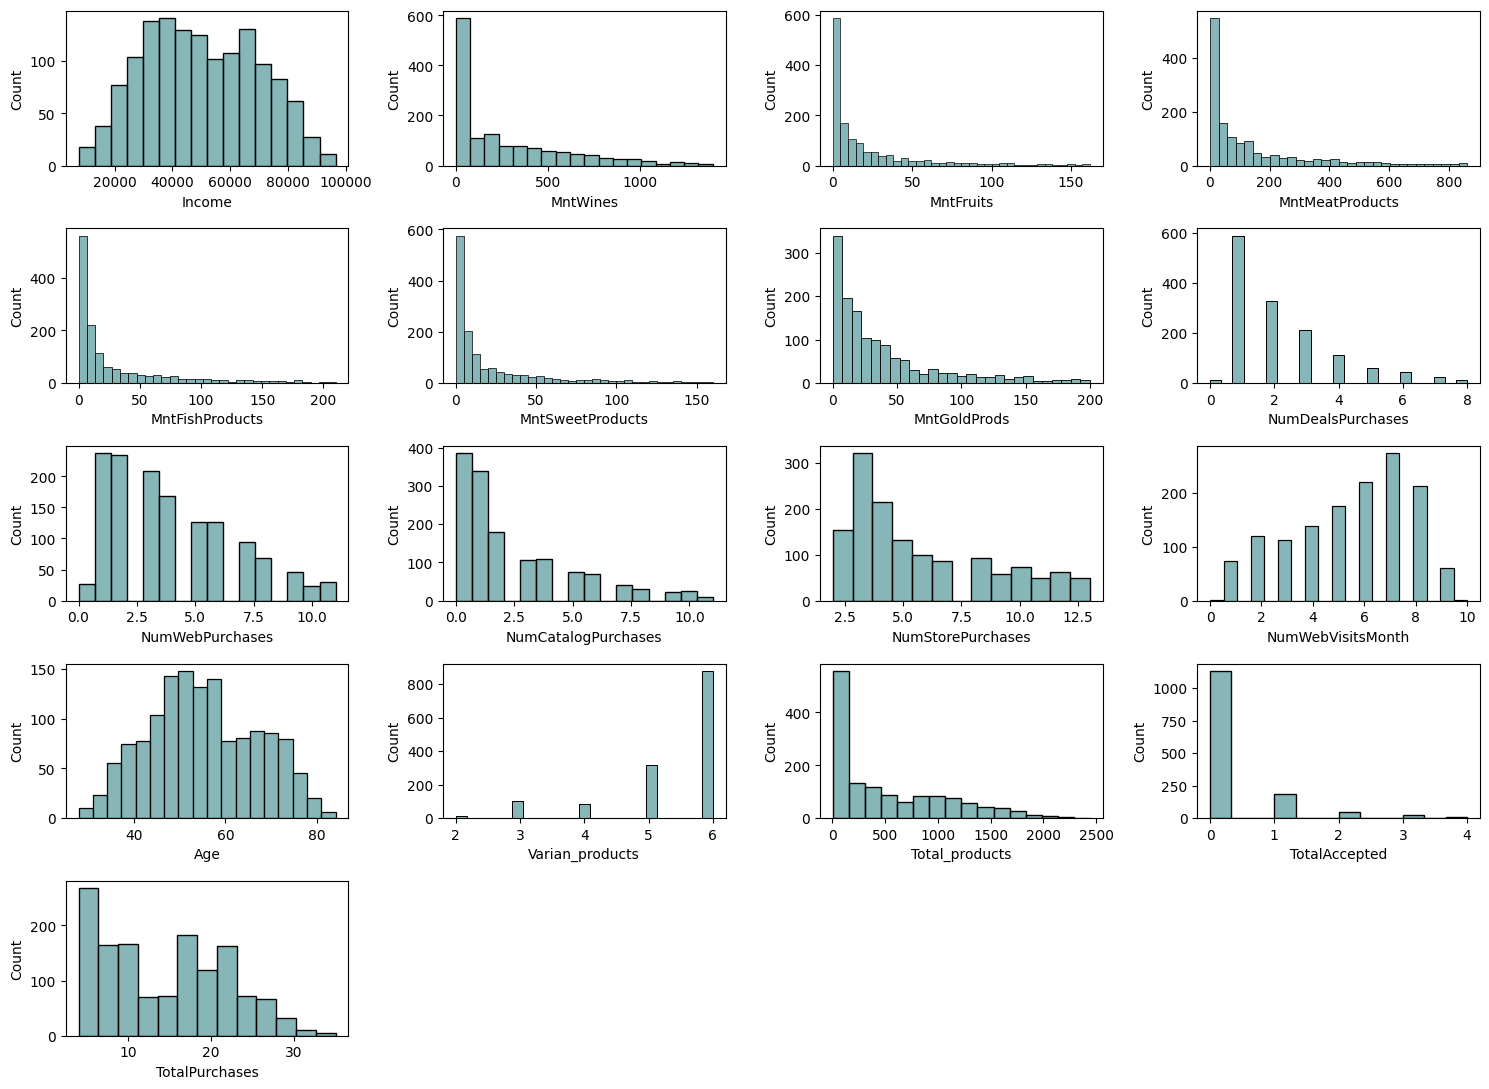

In [ ]:
plt.figure(figsize=(15,11))
for i in range (0,len(distribusi)):
  plt.subplot (5,4,i+1)
  sns.histplot(df_train[distribusi[i]],color ='cadetblue')
plt.tight_layout()

In [ ]:
df_log = np.log(df_train[distribusi])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
df_log1p = np.log1p(df_train[distribusi])

In [ ]:
# df_train[distribusi] = np.sqrt(df_train[distribusi])

In [ ]:
# df_train[distribusi] = np.square(df_train[distribusi])

In [ ]:
# from sklearn.preprocessing import PowerTransformer
# df_yeo = pd.DataFrame()
# transformer = PowerTransformer(method='yeo-johnson')
# df_yeo[distribusi] = transformer.fit_transform(df_train[distribusi])

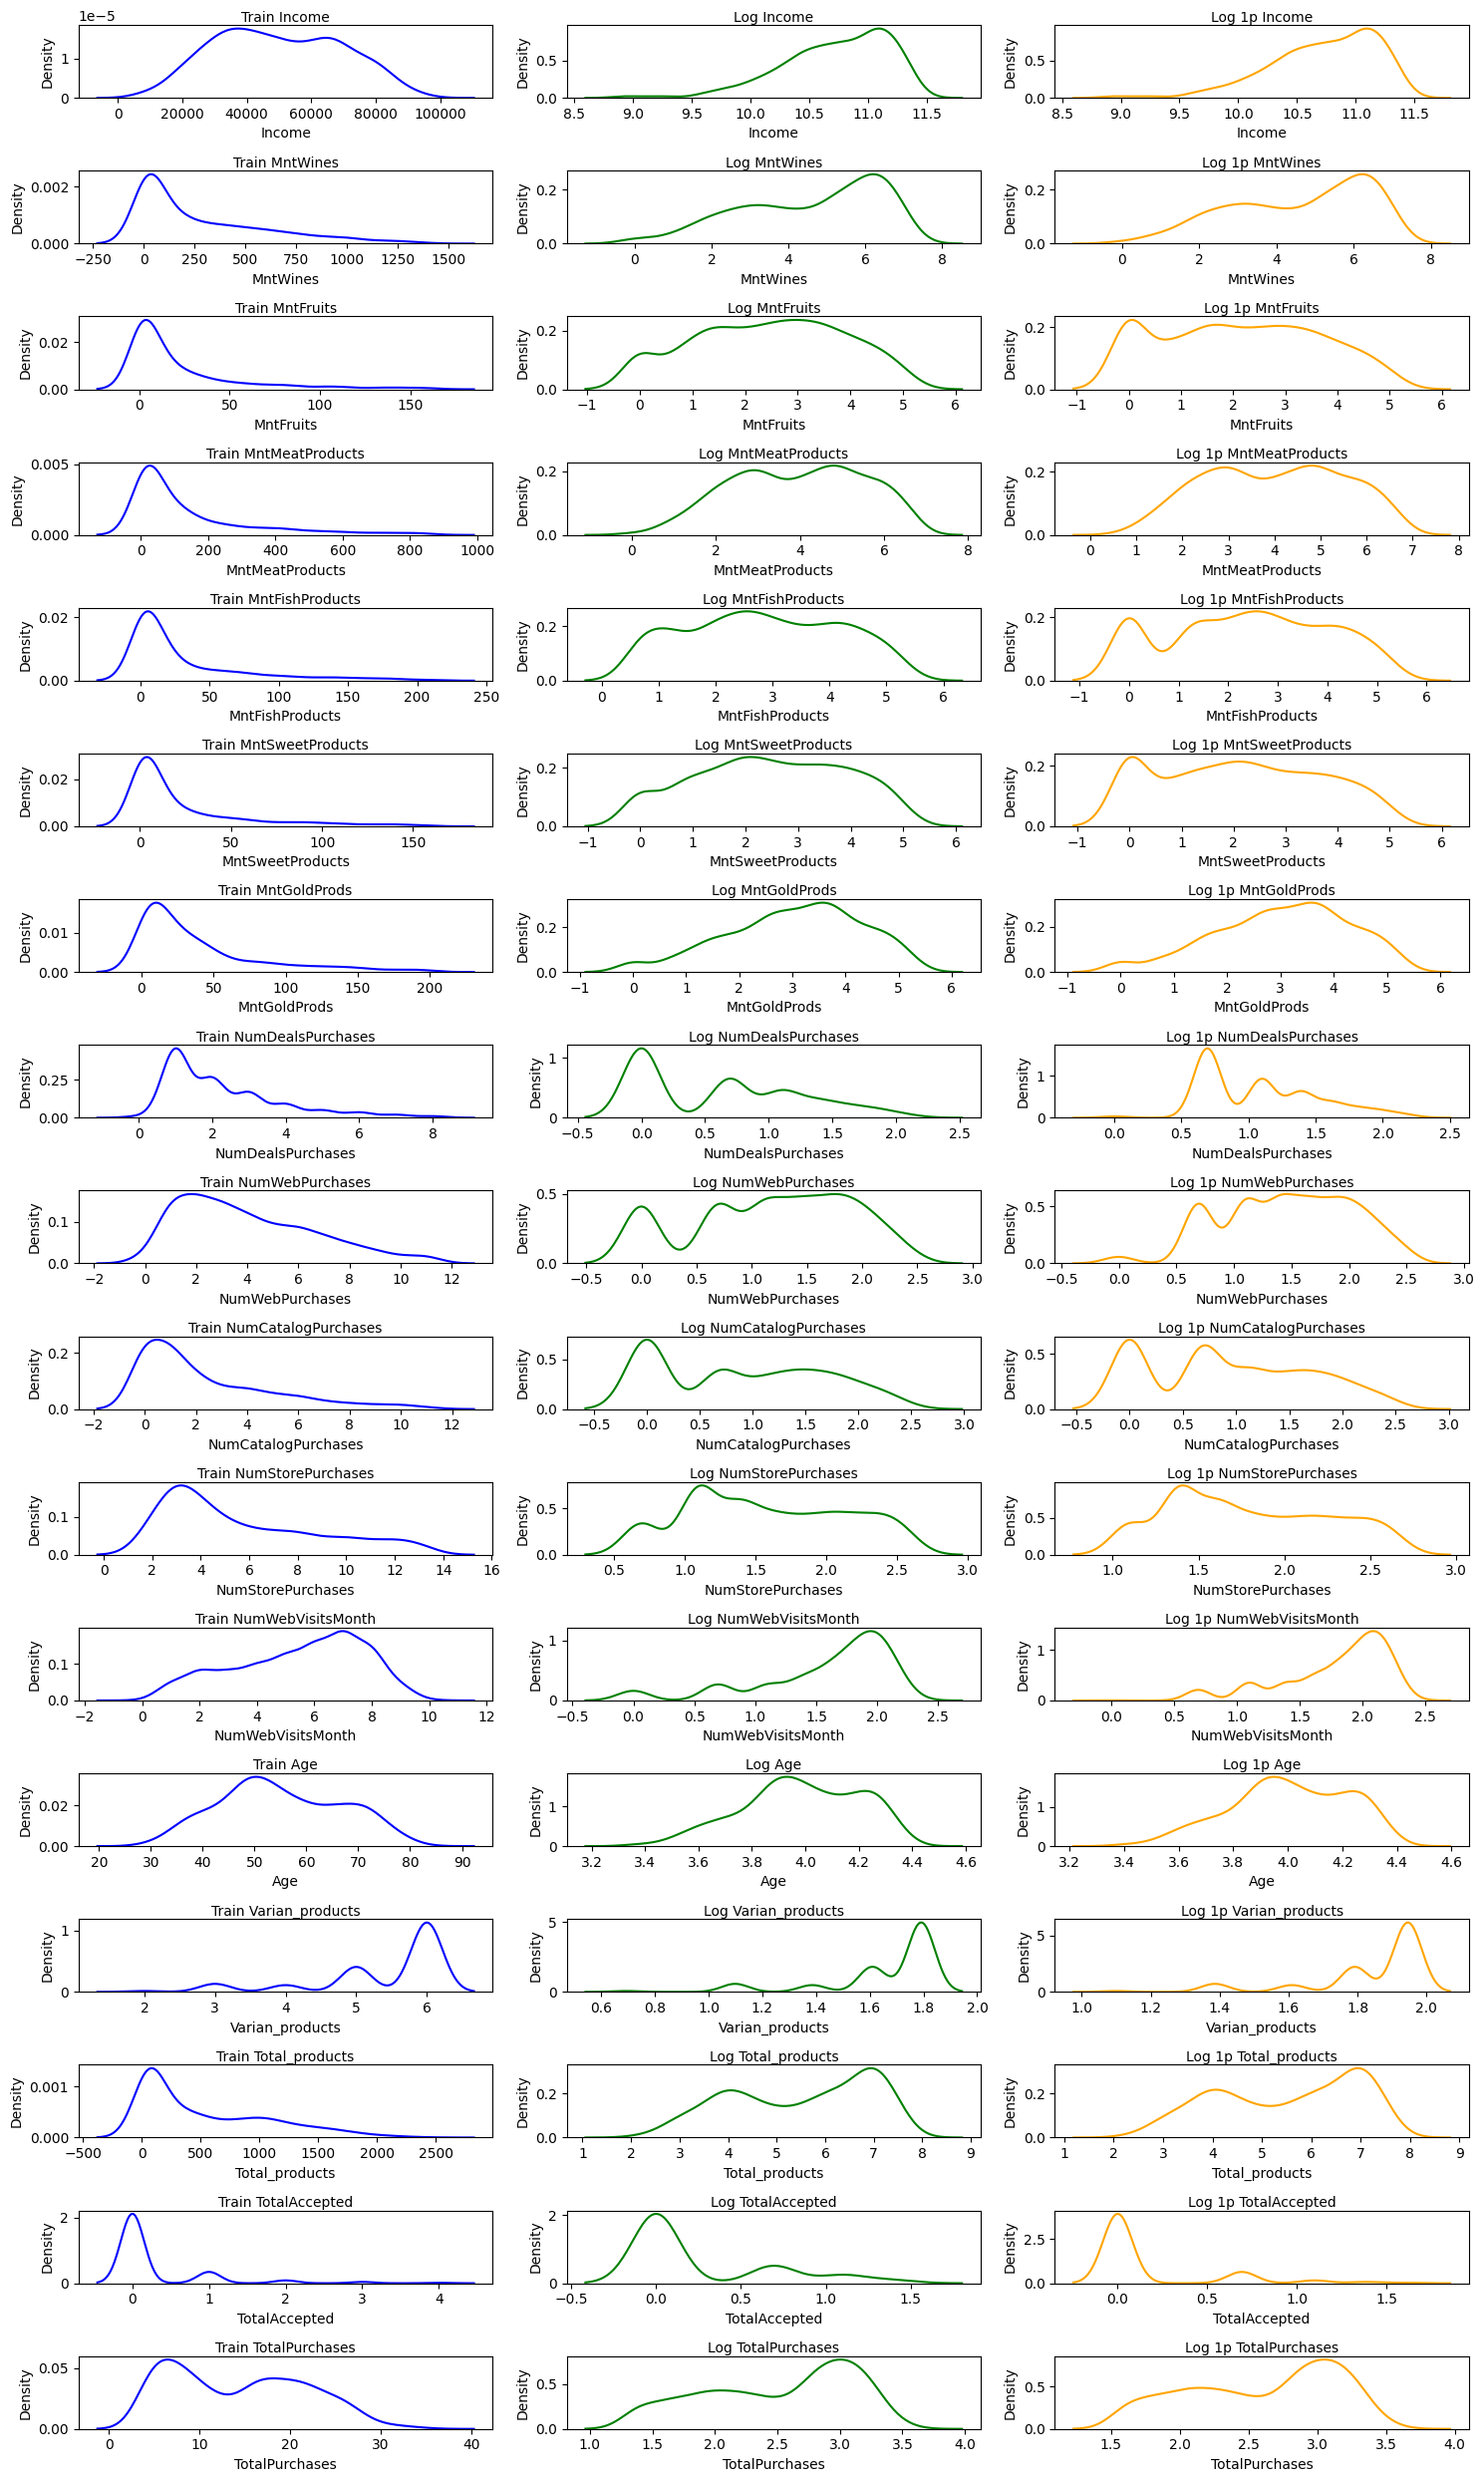

In [ ]:
fig, ax = plt.subplots(len(distribusi),3,figsize=(15,25))

colors = ['blue', 'green', 'orange', 'red']


for i in range(0,len(distribusi)):
    kde1 = sns.kdeplot(df_train[distribusi[i]], ax=ax[i][0],color=colors[0])
    kde2 = sns.kdeplot(df_log[distribusi[i]], ax=ax[i][1],color=colors[1])
    kde4 = sns.kdeplot(df_log1p[distribusi[i]], ax=ax[i][2],color=colors[2])


    ax[i][0].text(0.5, 1.05, f'Train {distribusi[i]}', transform=ax[i][0].transAxes, ha='center')
    ax[i][1].text(0.5, 1.05, f'Log {distribusi[i]}', transform=ax[i][1].transAxes, ha='center')
    ax[i][2].text(0.5, 1.05, f'Log 1p {distribusi[i]}', transform=ax[i][2].transAxes, ha='center')

    plt.tight_layout()


Dari perbandingan diatas dapat kita lihat jika antara log dan log1p kurang lebih sama karena tidak ada distribusi yang benar-benar menjadi distribusi normal, tetapi karena data memiliki banyak nilai 0 yang tidak bisa di log maka akan di gunakan log1p dimana semua nilai akan ditambah 1 terlebih dahulu

In [ ]:
# yeo_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']

df_train[distribusi] = df_log1p[distribusi]
# df_train[distribusi] = df_yeo[distribusi]

In [ ]:
# yeo_list = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']

# df_train[distribusi] = df_log[distribusi]
# df_train[yeo_list] = df_yeo[yeo_list]

Mengubah skala

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scalar_list = ['Kidhome','Teenhome','Recency','Varian_products','Total_products','Education','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']

x_test[scalar_list] = scaler.fit_transform(x_test[scalar_list])
df_train[scalar_list] = scaler.fit_transform(df_train[scalar_list])

In [ ]:
df_train.sample(5)

Year_Birth  Education Marital_Status    Income  Kidhome  Teenhome  \
467         1970   0.333333         single  0.566329      0.5       0.0   
1768        1961   0.000000       together  0.519004      0.0       0.0   
1004        1954   1.000000       together  0.623880      0.0       0.5   
2082        1960   0.333333       together  0.755182      0.0       0.5   
255         1974   1.000000         single  0.554097      0.5       0.0   

     Dt_Customer   Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  \
467   2012-10-31  0.131313  0.222234   0.136078  ...             0         0   
1768  2014-06-15  0.808081  0.095711   0.452041  ...             0         0   
1004  2013-05-17  0.505051  0.747250   0.215678  ...             0         0   
2082  2012-11-07  0.323232  0.784799   0.382019  ...             0         0   
255   2012-10-13  0.353535  0.444468   0.000000  ...             0         0   

      Marital_single  Marital_together  Response       Age  Varian_products  \
467                1                 0         0  0.595187         0.818068   
1768               0                 1         0  0.736117         1.000000   
1004               0                 1         0  0.832640         0.818068   
2082               0                 1         0  0.750535         1.000000   
255                1                 0         0  0.524970         0.339529   

      Total_products  TotalAccepted  TotalPurchases  
467         0.102690            0.0        0.000000  
1768        0.283238            0.0        0.170445  
1004        0.624649            0.0        0.619922  
2082        0.691748            0.0        0.648876  
255         0.237221            0.0        0.170445  

[5 rows x 33 columns]

## 2. Feature Engineering

### A. Feature selection (membuang feature yang kurang relevan atau redundan)

In [ ]:
df_train.sample(5)

Year_Birth  Education Marital_Status    Income  Kidhome  Teenhome  \
1           1954   0.333333         single  0.712749      0.5       0.5   
294         1965   0.333333       together  0.538238      0.5       0.5   
1169        1969   0.333333         single  0.934442      0.0       0.0   
1334        1978   0.666667       together  0.964153      0.5       0.0   
566         1962   0.333333         single  0.854463      0.0       0.5   

     Dt_Customer   Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  \
1     2014-03-08  0.383838  0.343120   0.136078  ...             0         0   
294   2013-03-12  0.060606  0.317945   0.136078  ...             0         0   
1169  2014-01-22  0.696970  0.814669   0.729045  ...             0         0   
1334  2012-08-18  0.242424  0.704199   0.000000  ...             0         0   
566   2012-12-05  0.808081  0.913743   0.470752  ...             0         0   

      Marital_single  Marital_together  Response       Age  Varian_products  \
1                  1                 0         0  0.832640         1.000000   
294                0                 1         0  0.676101         0.818068   
1169               1                 0         0  0.611943         1.000000   
1334               0                 1         1  0.449016         0.602888   
566                1                 0         0  0.721472         1.000000   

      Total_products  TotalAccepted  TotalPurchases  
1           0.202569       0.000000        0.170445  
294         0.189342       0.000000        0.000000  
1169        0.857411       0.000000        0.619922  
1334        0.810666       0.861353        0.726963  
566         0.852132       0.000000        0.702248  

[5 rows x 33 columns]

Feature Dt_Customer dihapus karena tanggal bergabungnya customer tidak mempengaruhi model, Feature Year_Birth dihapus karena sudah ada kolom Age, dan Marital Status karena sudah di one hot encoding:

In [ ]:
df_train = df_train.drop(['Dt_Customer','Year_Birth','Marital_Status'], axis=1)
x_test = x_test.drop(['Dt_Customer','Year_Birth','Marital_Status'], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 597 to 873
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1392 non-null   float64
 1   Income               1392 non-null   float64
 2   Kidhome              1392 non-null   float64
 3   Teenhome             1392 non-null   float64
 4   Recency              1392 non-null   float64
 5   MntWines             1392 non-null   float64
 6   MntFruits            1392 non-null   float64
 7   MntMeatProducts      1392 non-null   float64
 8   MntFishProducts      1392 non-null   float64
 9   MntSweetProducts     1392 non-null   float64
 10  MntGoldProds         1392 non-null   float64
 11  NumDealsPurchases    1392 non-null   float64
 12  NumWebPurchases      1392 non-null   float64
 13  NumCatalogPurchases  1392 non-null   float64
 14  NumStorePurchases    1392 non-null   float64
 15  NumWebVisitsMonth    1392 non-null   

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

y_train = df_train['Response']
X_train = df_train.drop('Response', axis=1)

nums = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
    'Age', 'Varian_products', 'Total_products', 'TotalAccepted',
    'TotalPurchases']

k_best = SelectKBest(score_func=f_classif, k='all')

X_train_k_best = k_best.fit_transform(X_train[nums], y_train)

# Mendapatkan skor dan nama fitur terbaik
feature_scores = pd.DataFrame({'Feature': X_train[nums].columns, 'Score': k_best.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Menampilkan skor fitur
print(feature_scores)

                Feature       Score
24        TotalAccepted  221.903526
18         AcceptedCmp1  130.648565
17         AcceptedCmp5   98.394283
15         AcceptedCmp3   74.621768
12  NumCatalogPurchases   72.462120
6       MntMeatProducts   50.796009
3               Recency   49.372085
9          MntGoldProds   48.349267
23       Total_products   46.898832
16         AcceptedCmp4   44.165055
19         AcceptedCmp2   43.451439
11      NumWebPurchases   35.035350
25       TotalPurchases   30.452916
2              Teenhome   28.825366
4              MntWines   26.369837
8      MntSweetProducts   22.809607
5             MntFruits   16.835848
0                Income   12.093496
7       MntFishProducts   11.181152
1               Kidhome    5.314368
22      Varian_products    4.595611
20             Complain    0.341484
14    NumWebVisitsMonth    0.238056
13    NumStorePurchases    0.100034
10    NumDealsPurchases    0.004716
21                  Age    0.000973


In [ ]:
cats = ['Education','Marital_single','Marital_together']

from sklearn.feature_selection import chi2
k_best = SelectKBest(score_func=chi2, k='all')  # 'all' untuk mendapatkan semua fitur, atau Anda dapat tentukan jumlah fitur (k) yang diinginkan

# Melakukan fit pada data training dan transformasi pada data training
X_train_k_best = k_best.fit_transform(X_train[cats], y_train)


# Mendapatkan skor dan nama fitur terbaik
feature_scores = pd.DataFrame({'Feature': X_train[cats].columns, 'Score': k_best.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Menampilkan skor fitur
print(feature_scores)

            Feature      Score
1    Marital_single  13.398273
2  Marital_together   7.164457
0         Education   2.564118


In [ ]:
# selected_columns = [
#     'TotalAccepted',
#     'NumCatalogPurchases',
#     'Varian_products',
#     'Recency',
#     'NumWebPurchases',
#     'Teenhome',
#     'Age',
# ]

# selected_columns = [
#      'TotalAccepted',
#      'NumCatalogPurchases',
#      'Total_products',
#      'Recency',
#      'NumWebPurchases',
#      'Teenhome',
#      'Marital_single',
#  ]

selected_columns = [
    'TotalAccepted',
    'Recency',
    'Teenhome',
    'Total_products',
    'Education',
    'Marital_together',
    'Marital_single',
    'TotalPurchases'
]

X_train = X_train.drop(X_train.columns.difference(selected_columns), axis=1)
x_test = x_test.drop(x_test.columns.difference(selected_columns), axis=1)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 868 to 411
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         664 non-null    float64
 1   Teenhome          664 non-null    float64
 2   Recency           664 non-null    float64
 3   Marital_single    664 non-null    uint8  
 4   Marital_together  664 non-null    uint8  
 5   Total_products    664 non-null    float64
 6   TotalAccepted     664 non-null    float64
 7   TotalPurchases    664 non-null    float64
dtypes: float64(6), uint8(2)
memory usage: 37.6 KB


### 1 F. Handle class imbalance


In [ ]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_resampled.value_counts())

Class distribution before SMOTE: 0    1209
1     183
Name: Response, dtype: int64
Class distribution after SMOTE: 0    1209
1    1209
Name: Response, dtype: int64


### C. Tuliskan minimal 4 feature tambahan (Hanya perlu dijawab tidak perlu di implementasi)

*   Total Amount Spent
*   Average Purchases Per Visit
*   Last Purchase Date
*   Score



# Stage 3 Modeling


##1A. Split Data Train & Test

Split sudah dilakukan pada stage sebelumnya

##1B. Modeling

In [ ]:
def evaluate_and_print_metrics(X_train, y_train, X_test, y_test, model):

# Evaluasi data train
  y_train_pred = model.predict(X_train)
  acc_train = accuracy_score(y_train, y_train_pred)
  prec_train = precision_score(y_train, y_train_pred,average='weighted')
  rec_train = recall_score(y_train, y_train_pred,average='weighted')

  # Evaluasi data test
  y_test_pred = model.predict(X_test)
  acc_test = accuracy_score(y_test, y_test_pred)
  prec_test = precision_score(y_test, y_test_pred, average='weighted')
  rec_test = recall_score(y_test, y_test_pred,average='weighted')

  # Hitung selisih
  acc_diff = (acc_train - acc_test) / acc_test * 100
  prec_diff = (prec_train - prec_test) / prec_test * 100
  rec_diff = (rec_train - rec_test) / rec_test * 100

  # Print hasil
  print(f'Accuracy - Train: {acc_train:.3f} - Test: {acc_test:.3f} - Diff: {acc_diff:.2f}%')
  print(f'Precision - Train: {prec_train:.3f} - Test: {prec_test:.3f} - Diff: {prec_diff:.2f}%')
  print(f'Recall - Train: {rec_train:.3f} - Test: {rec_test:.3f} - Diff: {rec_diff:.2f}%')

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_resampled.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


In [ ]:
def show_feature_importance_svm(model, X_test, y_test):
    # Evaluasi performa model pada data pengujian
    y_pred = model.predict(X_test)

    # Hitung feature importances menggunakan permutation_importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Ambil hasil feature importances dan rata-ratakan untuk setiap fitur
    importances = result.importances_mean

    # Urutkan fitur berdasarkan tingkat kepentingan
    indices = np.argsort(importances)[::-1]

    # Plot 25 fitur teratas
    feat_importances = pd.Series(importances[indices][:25], index=X_test.columns[indices][:25])
    ax = feat_importances.plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')
    plt.show()


In [ ]:
print(x_test.isnull().sum())
print(y_test.isnull().sum())
X_resampled.sample(5)

Education           0
Teenhome            0
Recency             0
Marital_single      0
Marital_together    0
Total_products      0
TotalAccepted       0
TotalPurchases      0
dtype: int64
Response    0
dtype: int64


Education  Teenhome   Recency  Marital_single  Marital_together  \
375    0.333333       1.0  0.979798               0                 1   
1096   0.333333       0.0  0.606061               0                 1   
549    0.333333       0.0  0.404040               0                 1   
2128   0.639962       0.0  0.193928               0                 1   
280    0.666667       0.0  0.202020               0                 1   

      Total_products  TotalAccepted  TotalPurchases  
375         0.926497       0.682606        0.648876  
1096        0.875041       0.682606        0.890469  
549         0.102690       0.000000        0.000000  
2128        0.968231       0.430677        0.769354  
280         0.972463       0.430677        0.773046

In [ ]:
x_test.sample(5)

Education  Teenhome   Recency  Marital_single  Marital_together  \
507    0.333333       0.0  0.777778               1                 0   
1853   0.333333       0.0  0.010101               0                 1   
957    0.333333       0.5  0.949495               1                 0   
892    0.333333       0.0  0.939394               0                 1   
1643   0.000000       0.0  0.949495               0                 1   

      Total_products  TotalAccepted  TotalPurchases  
507         0.456064            0.0        0.488372  
1853        0.621869            0.0        0.302326  
957         0.271968            0.0        0.488372  
892         0.394831            0.0        0.558140  
1643        0.007555            0.0        0.093023

In [ ]:
y_train.isna().sum()

0

###Decision Tree

Accuracy - Train: 0.997 - Test: 0.712 - Diff: 39.97%
Precision - Train: 0.997 - Test: 0.790 - Diff: 26.14%
Recall - Train: 0.997 - Test: 0.712 - Diff: 39.97%


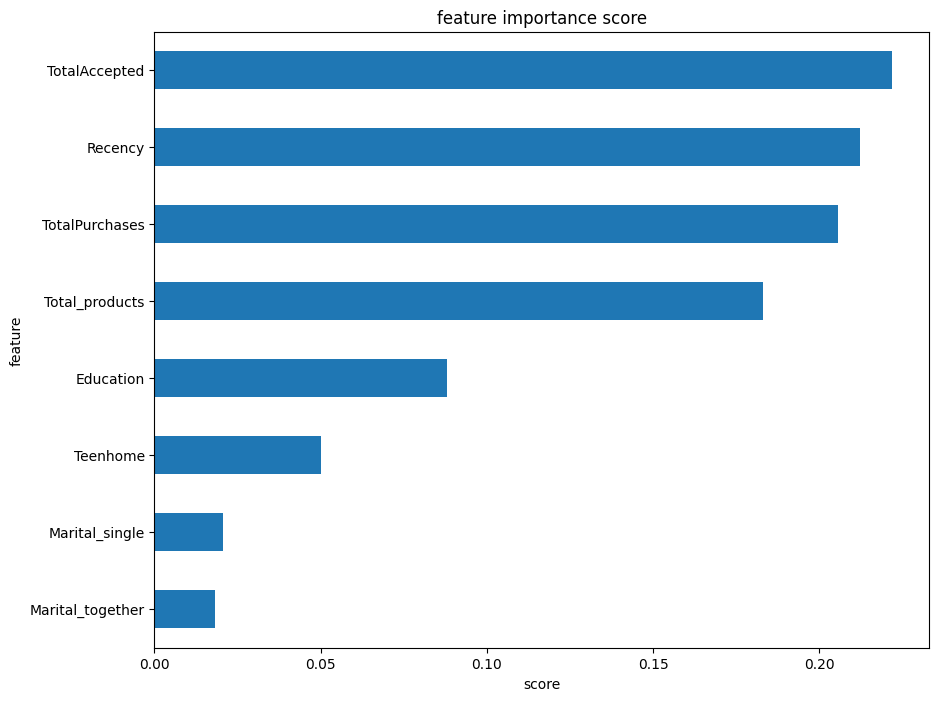

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_resampled, y_resampled)

evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,dtc)

show_feature_importance(dtc)

###Random Forest Classifier


Accuracy - Train: 0.997 - Test: 0.848 - Diff: 17.60%
Precision - Train: 0.997 - Test: 0.838 - Diff: 18.92%
Recall - Train: 0.997 - Test: 0.848 - Diff: 17.60%


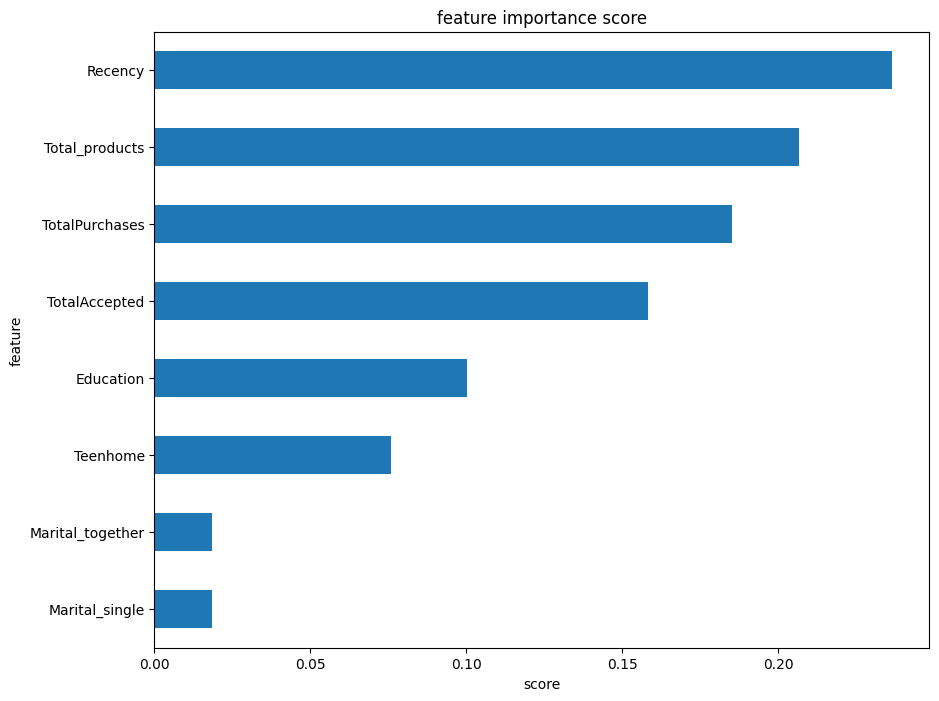

In [ ]:
# rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc = RandomForestClassifier()

rfc.fit(X_resampled, y_resampled)
evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,rfc)

show_feature_importance(rfc)

###SVM


Accuracy - Train: 0.740 - Test: 0.827 - Diff: -10.47%
Precision - Train: 0.744 - Test: 0.852 - Diff: -12.71%
Recall - Train: 0.740 - Test: 0.827 - Diff: -10.47%


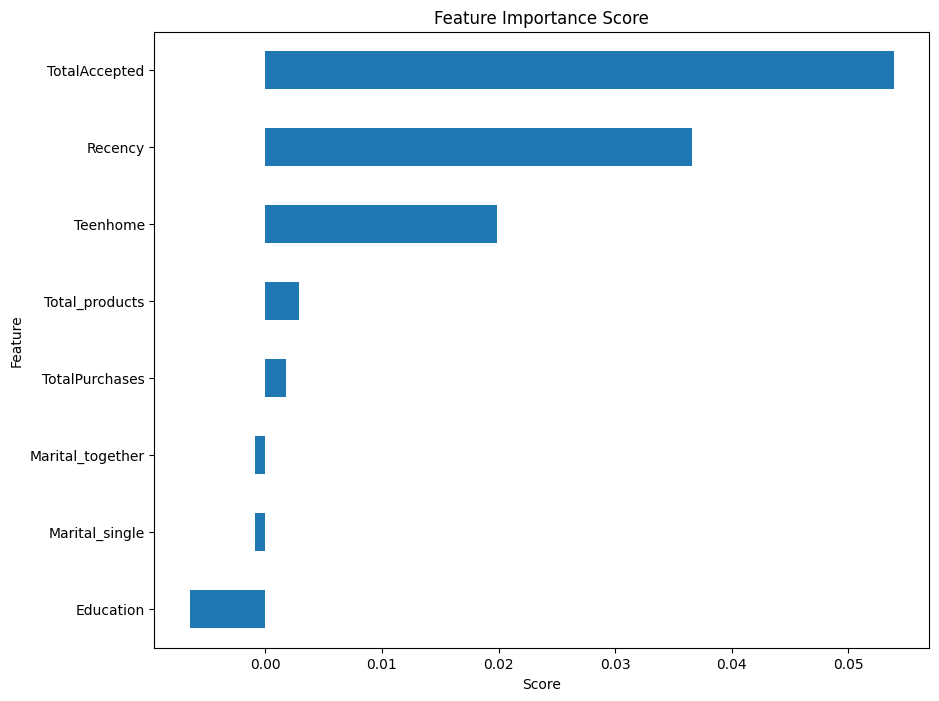

In [ ]:
svc = svm.SVC(kernel='linear', C=1.0)

svc.fit(X_resampled, y_resampled)
evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,svc)

show_feature_importance_svm(svc, x_test, y_test)

##Adaboost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy - Train: 0.997 - Test: 0.828 - Diff: 20.38%
Precision - Train: 0.997 - Test: 0.805 - Diff: 23.87%
Recall - Train: 0.997 - Test: 0.828 - Diff: 20.38%


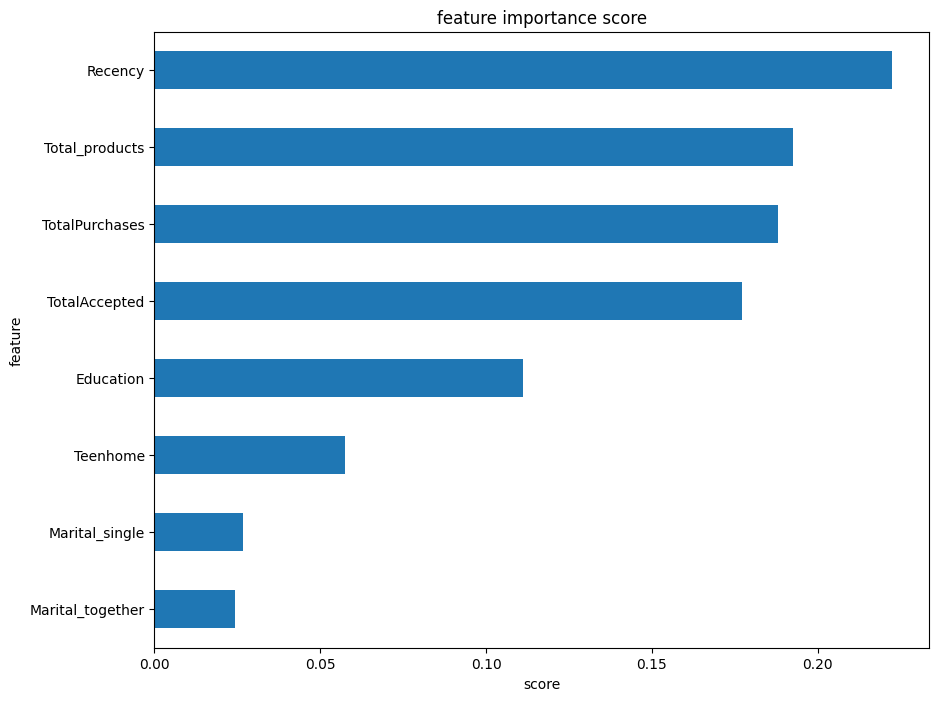

In [ ]:
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=100)

abc.fit(X_resampled, y_resampled)
evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,abc)

show_feature_importance(abc)

##XGBoost


Accuracy - Train: 0.740 - Test: 0.827 - Diff: -10.47%
Precision - Train: 0.744 - Test: 0.852 - Diff: -12.71%
Recall - Train: 0.740 - Test: 0.827 - Diff: -10.47%


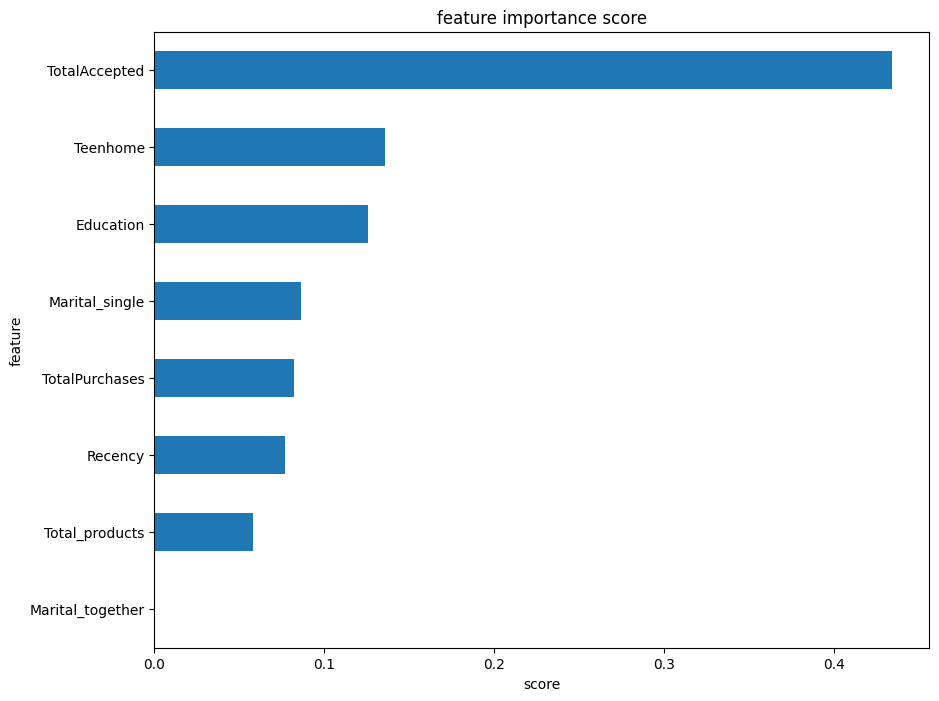

In [ ]:
xg = XGBClassifier()

xg.fit(X_resampled, y_resampled)
evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,svc)

show_feature_importance(xg)

##GridCVSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def show_feature_importance_from_gridsearch(grid_search, X):
    model = grid_search.best_estimator_
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances = feat_importances.nlargest(25)

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)

    # Ubah urutan feature importance terbesar di atas
    feat_importances = feat_importances.sort_values(ascending=True)

    # Plot feat importance
    ax = feat_importances.plot(kind='barh', color='#2b4b82', ax=ax)

    # Buat bingkai putih
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['top'].set_color('white')

    # Atur lebar bingkai
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)

    # Atur bold label y
    ax.set_yticklabels(ax.get_yticklabels(),color='#2b4b82', fontweight='bold',fontsize=14)
    # Atur bold label x

    ax.set_xticklabels(ax.get_xticklabels(),color='#2b4b82', fontweight='bold',fontsize=14)

    # Sisanya sama seperti sebelumnya
    # ax.tick_params(axis='x', colors='#2b4b82',weight = 'bold')
    # ax.tick_params(axis='y', colors='#2b4b82',weight = 'bold')
    # ax.set_title('Feature Importance', color='#2b4b82', fontweight = 'bold')

    # plt.xlabel('Score', color='#2b4b82', fontweight='bold')
    # plt.ylabel('Feature', color='#2b4b82', fontweight='bold')
    # plt.title('feature importance from gridsearch')
    plt.tight_layout()

    plt.savefig('plot.png', transparent=True)

    plt.show()

In [ ]:
def show_feature_importance_svm_grid(model, X_test, y_test):

  # Ambil model terbaik
  best_model = model.best_estimator_

  # Hitung permutation importance
  result = permutation_importance(best_model, X_test, y_test, n_repeats=10)

  importances = result.importances_mean

  # Urutkan fitur
  indices = np.argsort(importances)[::-1]

  # Plot
  feat_importances = pd.Series(importances[indices][:25], index=X_test.columns[indices][:25])

  ax = feat_importances.plot(kind='barh',color='#f7b4a7', figsize=(10, 8))
  ax.invert_yaxis()

  plt.xlabel('Score', color='white')
  plt.ylabel('Feature', color='white')
  plt.title('Feature Importance from SVM Model')

  plt.savefig('plot.png', transparent=True)
  plt.show()

###SVM


Accuracy - Train: 0.942 - Test: 0.797 - Diff: 18.20%
Precision - Train: 0.943 - Test: 0.761 - Diff: 23.85%
Recall - Train: 0.942 - Test: 0.797 - Diff: 18.20%


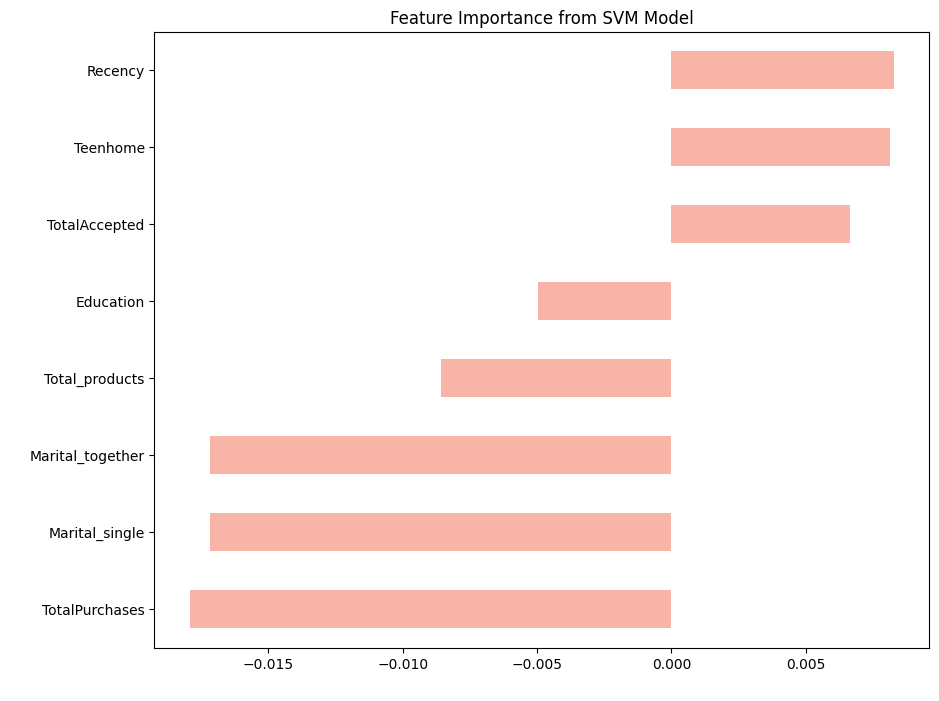

In [ ]:
#Parameter Grid SVM
svm_param_grid ={'C':[0.1,1,10,100],'kernel':['linear','rbf'],'gamma':[0.01,0.1,1,10]}

# Grid search untuk SVM
svc_grid_search = GridSearchCV(svc, svm_param_grid, cv=5)
svc_grid_search.fit(X_resampled, y_resampled)

evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,svc_grid_search)

show_feature_importance_svm_grid(svc_grid_search, x_test, y_test)


###Random Forest Classifier


Accuracy - Train: 0.996 - Test: 0.845 - Diff: 17.92%
Precision - Train: 0.996 - Test: 0.840 - Diff: 18.65%
Recall - Train: 0.996 - Test: 0.845 - Diff: 17.92%


<ipython-input-212-15db92970725>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),color='#2b4b82', fontweight='bold',fontsize=14)


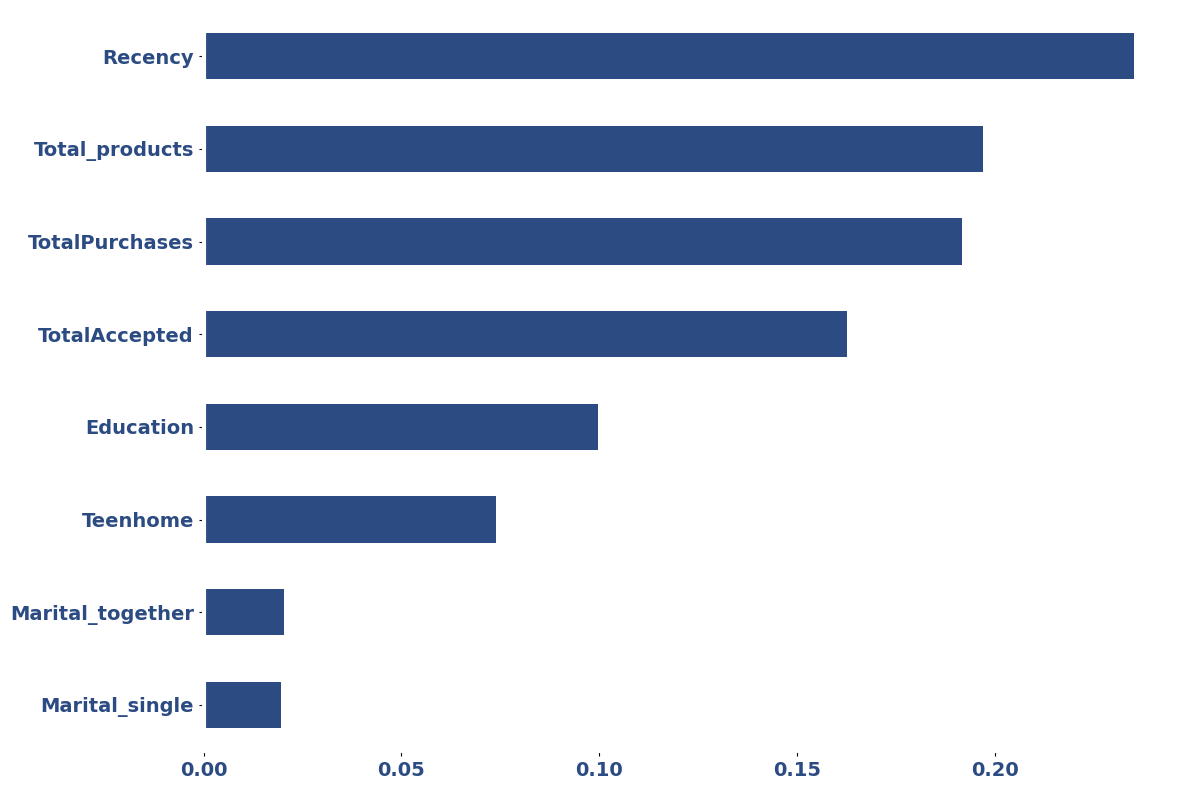

In [ ]:
#Parameter Grid RF
rfc_param_grid ={'n_estimators':[50,75,100],'max_depth':[10,20,30],'min_samples_split':[3,5,7]}

# Grid search untuk Random Forest
rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=5)
rfc_grid_search.fit(X_resampled, y_resampled)

evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,rfc_grid_search)

show_feature_importance_from_gridsearch(rfc_grid_search, x_test)

###XGBoost

Accuracy - Train: 0.916 - Test: 0.795 - Diff: 15.25%
Precision - Train: 0.917 - Test: 0.850 - Diff: 7.86%
Recall - Train: 0.916 - Test: 0.795 - Diff: 15.25%


<ipython-input-212-15db92970725>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),color='#2b4b82', fontweight='bold',fontsize=14)


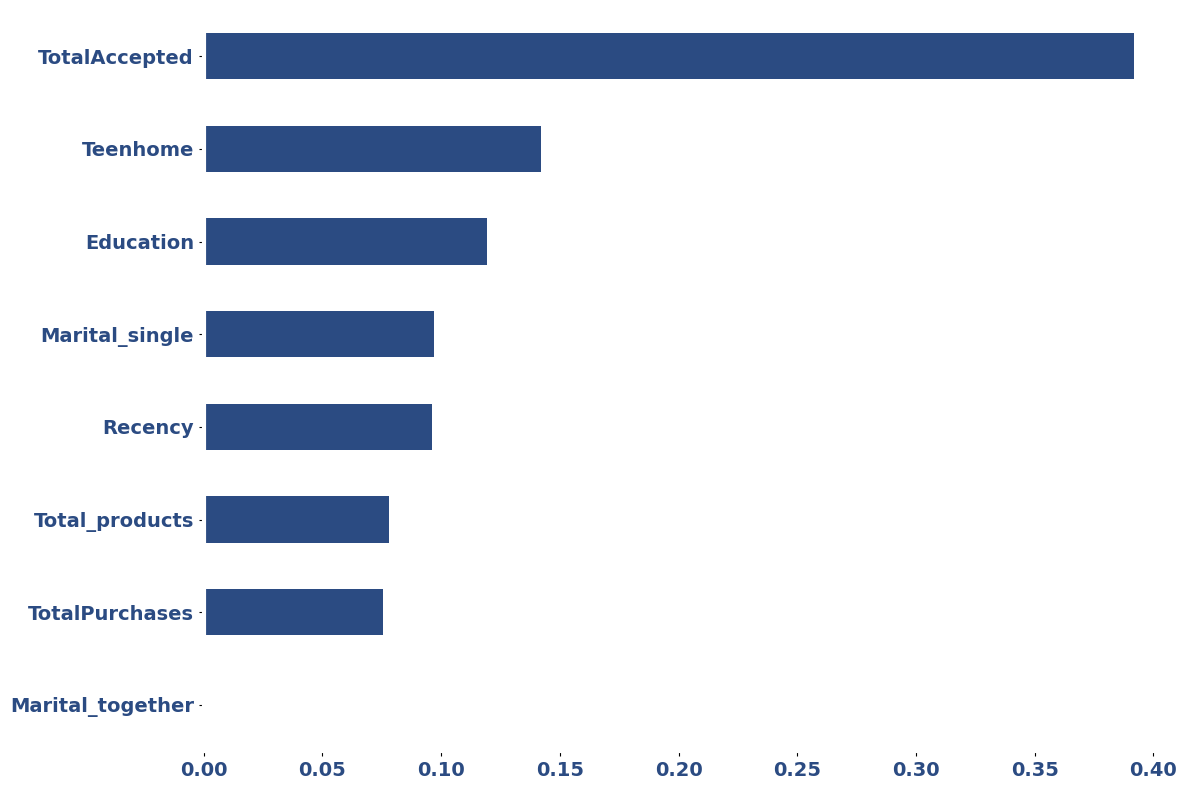

In [ ]:
#Parameter XGBoost
xg_param_grid ={'learning_rate':[0.03,0.1,0.15],'n_estimators':[5,10,15],'max_depth':[1,2,6]}

#Model yang di cek per algoritma

# Grid search untuk XGBoost
xgb_grid_search = GridSearchCV(xg, xg_param_grid, cv=5)
xgb_grid_search.fit(X_resampled, y_resampled)

evaluate_and_print_metrics(X_resampled, y_resampled,x_test,y_test,xgb_grid_search)
show_feature_importance_from_gridsearch(xgb_grid_search, x_test)

##Data Insight

Pada XGBoost dapat dilihat bahwa feature paling tinggi adalah Total Accpted diikuti dengan Newwebpurchase dan varian product. Penggunaan grafik menampilkan tingkat dari setiap fitur, dengan mengidentifikasi pengaruh terhadap prediksi.

Rekomendasi 1 :
Pada Campaign berikutnya utamakan customer yang sudah pernah menerima campaign sebelumnya
Rekomendasi 2 :
Karena NumWebPurchase berada pada peringkat kedua maka disarankan membuat promo pada pembelian online/promo potongan ongkos kirim dengan pihak delivery
Rekomendasi 3:
Variasi produk menunjukkan variasi atau keberagaman produk yang ditawarkan. analisis dapat melibatkan identifikasi produk-produk yang paling bervariasi dan variasi ini dapat terlihat dampat positif atau negatif pada total accepted

# Stage 4 Evaluasi dan Bisnis Rekomendasi

In [ ]:
df_eval = pd.read_csv('marketing_campaign.csv',sep=';')
df_eval2 = df_eval.copy()

###Feature Enginnering

In [ ]:
df_eval['Marital_Status'] = df_eval['Marital_Status'].str.lower()
df_eval['Education'] = df_eval['Education'].str.lower()

In [ ]:
# Drop Kolom yang tidak dibutuhkan

df_eval = df_eval.drop(['Z_CostContact','Z_Revenue'], axis=1)

####Marital

In [ ]:
single = ['divorced','widow','alone']
together = ['married']

df_eval['Marital_Status'] = df_eval['Marital_Status'].apply(lambda x: 'single' if x in single else x)
df_eval['Marital_Status'] = df_eval['Marital_Status'].apply(lambda x: 'together' if x in together else x)

df_eval['Marital_Status'].value_counts()

together    1444
single       792
absurd         2
yolo           2
Name: Marital_Status, dtype: int64

####Education

In [ ]:
df['Education'] = df['Education'].replace('2n cycle', 'master')
df['Education'].value_counts()

1    1115
2     564
3     479
0      54
Name: Education, dtype: int64

In [ ]:
mapping_education = {'basic':0,
                     'graduation':1,
                     'master':2,
                     'phd':3}
df_eval['Education'] = df_eval['Education'].map(mapping_education)

In [ ]:
dummy_marital = pd.get_dummies(df_eval['Marital_Status'], prefix='Marital')
df_eval = pd.concat([df_eval, dummy_marital], axis=1)

In [ ]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2037 non-null   float64
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

####Age

In [ ]:
current_year = datetime.datetime.now().year
df_eval['Age'] = current_year - df_eval['Year_Birth']

####Varian dan Total Produk

In [ ]:
# Membuat feature jumlah kategori yang pernah dibeli costumer
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_eval['Varian_products'] = (df_eval[products] > 0).sum(axis=1)
df_eval['Total_products'] = df_eval[products].sum(axis=1)
df_eval[products+['Varian_products','Total_products']]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  Varian_products  Total_products  
0               88                6            1617  
1                6                6              27  
2               42                6             776  
3                5                6              53  
4               15                6             422  
...            ...              ...             ...  
2235           247                6            1341  
2236             8                3             444  
2237            24                6            1241  
2238            61                6             843  
2239            21                6             172  

[2240 rows x 8 columns]

####Total Accepted

In [ ]:
# Membuat feature jumlah campaign diterima

df_eval['TotalAccepted'] = df_eval[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

####Total Purchases

In [ ]:
df_eval['TotalPurchases'] = df_eval[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

###Prediksi data Evaluasi

####Split Dataframe Evaluasi

In [ ]:
target = ['Response']
y_eval = df_eval[target]
x_eval = df_eval.drop(target, axis=1)


####Standarisasi

In [ ]:
scalar_list = ['Kidhome','Teenhome','Recency','Varian_products','Total_products','Education','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Varian_products','Total_products','TotalAccepted','TotalPurchases']

x_eval[scalar_list] = scaler.fit_transform(x_eval[scalar_list])


In [ ]:
x_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2037 non-null   float64
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         2240 non-null   float64
 15  NumDealsPurchases    2240 non-null   f

####Selected Column

In [ ]:
x_eval = x_eval.drop(x_eval.columns.difference(selected_columns), axis=1)

#### Prediksi ke Model

In [ ]:
evaluate_and_print_metrics(X_resampled, y_resampled,x_eval,y_eval,xgb_grid_search)

Accuracy - Train: 0.916 - Test: 0.788 - Diff: 16.31%
Precision - Train: 0.917 - Test: 0.851 - Diff: 7.72%
Recall - Train: 0.916 - Test: 0.788 - Diff: 16.31%


In [ ]:
hasil = xgb_grid_search.predict(x_eval)

###EDA

####Convertion Rate

##### Convertion rate sebelum modeling

In [ ]:
df_eval2.shape[0]

2240

In [ ]:
df_eval2[df_eval['Response']==1].shape[0]

334

##### Convertion rate sesudah sesudah

In [ ]:
df_eval['predict'] = hasil
df_eval[df_eval['predict']==1].shape[0]

589

In [ ]:
df_eval[(df_eval['predict']==1) & (df_eval['Response'] == 1)].shape[0]

224

##### Bisa kita lihat Prediksi jumlah campaign adalah 589 dan yang menerima campaign berjumlah 224 dari yang sebelumnya 2240 dan yang menerima campaign berjumlah 334

####Persiapan dataframe

In [ ]:
df_predict_true = df_eval[df_eval['predict']==1]
df_eval_filtered = df_eval[(df_eval['predict']==1)&(df_eval['Response']==1)]

Education  Jumlah
0        0.0       1
1        1.0     106
2        2.0      40
3        3.0      62

####Total Accepted

<Axes: >

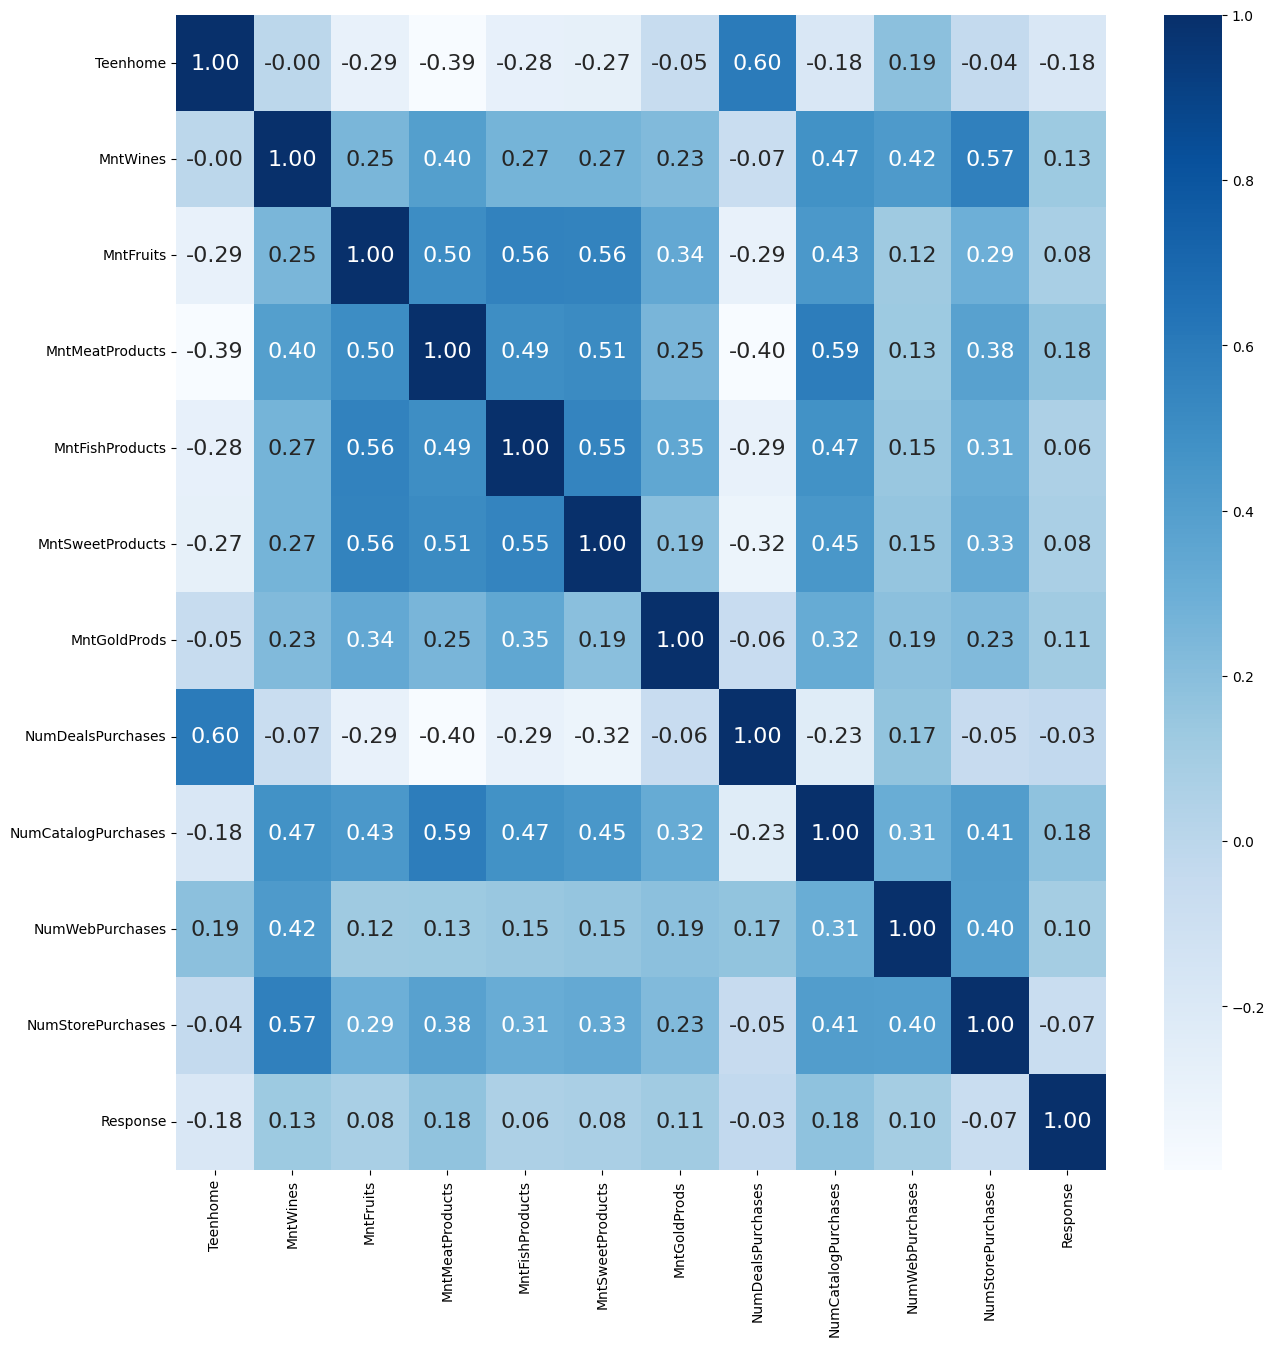

In [ ]:
corr_list = ['Teenhome','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases','NumWebPurchases', 'NumStorePurchases','Response']
plt.figure(figsize=(15, 15))
sns.heatmap(df_predict_true[corr_list].corr(),cmap='Blues',annot=True,fmt='.2f',annot_kws={"size": 16})

Dapat dilihat bahwa jenis produk yang berkorelasi paling tinggi dengan total accepted adalah wine.

Rekomendasi yang kami berikan :


*   Gamification penawaran campaign. Buat milestone penawaran campaign dan ketika milestone sudah dicapai customer akan mendapatkan hadiah khusus, agar customer bersemangat mengikut campaign.
*   Hindari pemberian discount dalam campaign, dikarenakan korelasi Numdealspurchase negatif terhadap total penerimaan campaign. Aplikasikan kembali strategi campaign kelima dikarenakan memiliki korelasi yang tertinggi terhadap response dibanding campaign sebelumnya.
*   Buat paket bundle antara produk yang memiliki korelasi tinggi dan rendah contohnya antara wine atau meat dengan fruit atau fish. Hal ini bertujuan untuk meningkatkan penjualan wine atau meat dan mencegah produk yang jarang dibeli rusak


####Teenhome

<ipython-input-242-9b334becdcc7>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, fontweight='bold')
<ipython-input-242-9b334becdcc7>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, fontweight='bold')


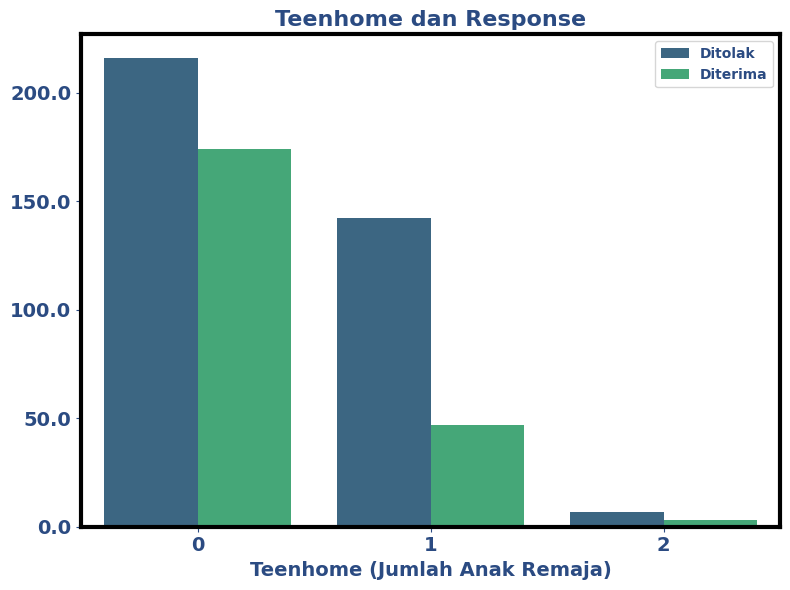

In [ ]:
df_teens = df_predict_true.copy()

mapping_reponse = {0:'Ditolak',
                     1:'Diterima'}
df_teens['Response'] = df_teens['Response'].map(mapping_reponse)

order_reponse = ['Ditolak','Diterima']

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_teens, x='Teenhome', hue='Response', palette='viridis',hue_order=order_reponse)

# Ganti title
ax.set_title('Teenhome dan Response', color='#2b4b82', fontweight='bold', fontsize=16)

# Ganti nama label
ax.set_xlabel('Teenhome (Jumlah Anak Remaja)', color='#2b4b82', fontweight='bold', fontsize=14)
ax.set_ylabel('', color='#2b4b82', fontweight='bold', fontsize=14)

# Ganti legend
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=14,
           labelcolor='#2b4b82', facecolor='white', frameon=True, edgecolor='#2b4b82')

legend = plt.legend()

# Buat legend bold
legend.texts[0].set_fontweight('bold')
legend.texts[1].set_fontweight('bold')

#Warna legend
legend.texts[0].set_color('#2b4b82')
legend.texts[1].set_color('#2b4b82')

# Ganti tick labels ke bold
ax.tick_params(labelcolor='#2b4b82', labelsize=14, color='#2b4b82')

# Atur lebar bingkai
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)

# Dapatkan ticks
xticks = ax.get_xticks()
yticks = ax.get_yticks()

# Buat bold ticks sumbu x
ax.set_xticklabels(xticks, fontweight='bold')

# Buat bold ticks sumbu y
ax.set_yticklabels(yticks, fontweight='bold')

plt.tight_layout()

plt.show()

Dapat dilihat bahwa response paling besar berasal dari Customer yang tidak memiliki anak remaja di rumah.

Rekomendasi yang kami berikan :

*   Bundle promo dengan branding untuk pasangan suami istri muda untuk customer yang sudah menikah
*   Bundle promo dengan branding anak muda untuk customer yang masih single

####Education


In [ ]:
mapping_education = {0:'Basic',
                     1:'Graduation',
                     2:'Master',
                     3:'PhD'}
df_eval_filtered['Education'] = df_eval_filtered['Education'].map(mapping_education)
df_predict_true['Education'] = df_predict_true['Education'].map(mapping_education)

<ipython-input-240-eb6a2f1082f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval_filtered['Education'] = df_eval_filtered['Education'].map(mapping_education)
<ipython-input-240-eb6a2f1082f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict_true['Education'] = df_predict_true['Education'].map(mapping_education)


In [ ]:
result2 = df_eval_filtered.groupby('Education').agg({
    'Response':'sum',
    'MntFruits':'sum',
    'MntMeatProducts':'sum',
    'MntFishProducts':'sum',
    'MntSweetProducts':'sum',
    'MntWines':'sum',
    'MntGoldProds':'sum',
}).reset_index()

Education  Response  MntFruits  MntMeatProducts  MntFishProducts  \
0       Basic         1          6                7                0   
1  Graduation       106       6126            39301             7650   
2      Master        40       1553            15799             2168   
3         PhD        62       1467            15918             2532   

   MntSweetProducts  MntWines  MntGoldProds  
0                 1         1             3  
1              4814     61292          8489  
2              1862     24900          2747  
3              2041     42249          3062

<ipython-input-245-ca4be5b58a1a>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=result2_melted, x='Education', y='TotalAmount', hue='Product', palette=custom_palette, ci=None)


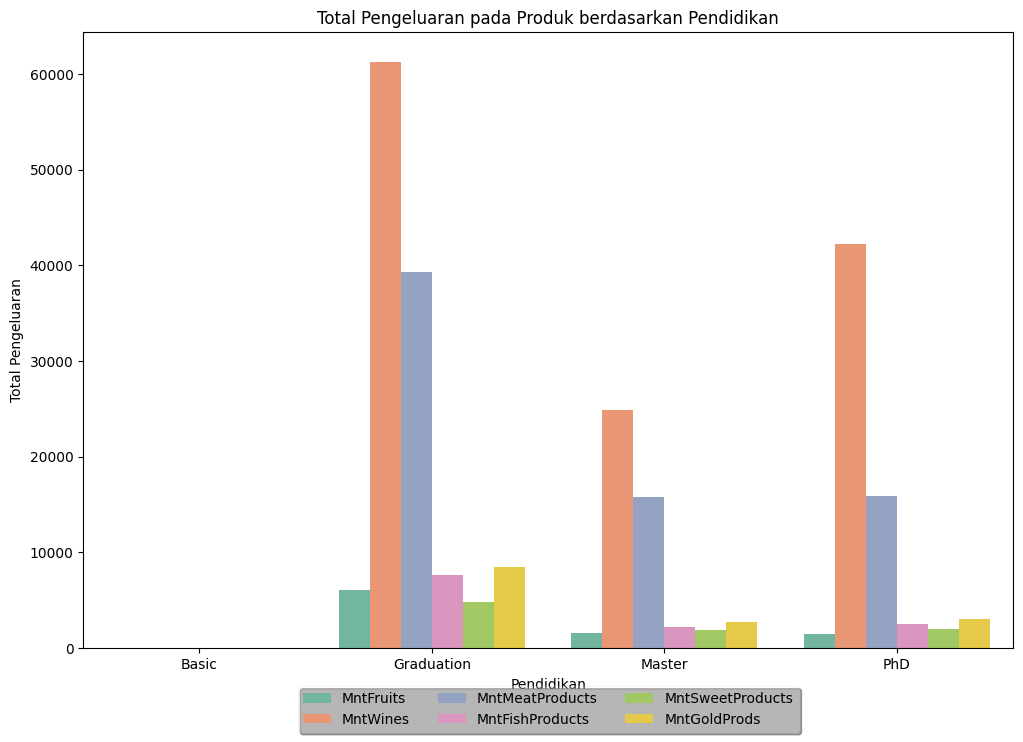

In [ ]:
# Melt DataFrame untuk membuat data dalam format yang sesuai untuk stack bar plot
result2_melted = pd.melt(result2, id_vars=['Education', 'Response'],
                         value_vars=['MntFruits','MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                         var_name='Product', value_name='TotalAmount')

# Visualisasi stack bar plot dengan palet kustom
plt.figure(figsize=(12, 8))

custom_palette = sns.color_palette("Set2", len(result2_melted['Product'].unique()))  # Ganti "Set2" dengan palet lain jika diinginkan
ax = sns.barplot(data=result2_melted, x='Education', y='TotalAmount', hue='Product', palette=custom_palette, ci=None)
plt.title('Total Pengeluaran pada Produk berdasarkan Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Total Pengeluaran')

# Tambahkan legenda di dalam plot
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)
legend.get_frame().set_alpha(0.2)




plt.show()

In [ ]:
result3 = df_eval_filtered.groupby('Education').agg({
    'Response':'sum',
    'NumWebPurchases':'sum',
    'NumCatalogPurchases':'sum',
    'NumStorePurchases':'sum',
}).reset_index()

Education  Response  NumWebPurchases  NumCatalogPurchases  \
0       Basic         1                1                    0   
1  Graduation       106              545                  550   
2      Master        40              172                  184   
3         PhD        62              351                  299   

   NumStorePurchases  NumDealsPurchases  
0                  2                  1  
1                689                182  
2                281                 75  
3                385                140

<ipython-input-249-5a2a8eb6f1fe>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=result3_melted, x='Education', y='TotalAmount', hue='PurchaseType', palette=custom_palette, ci=None)


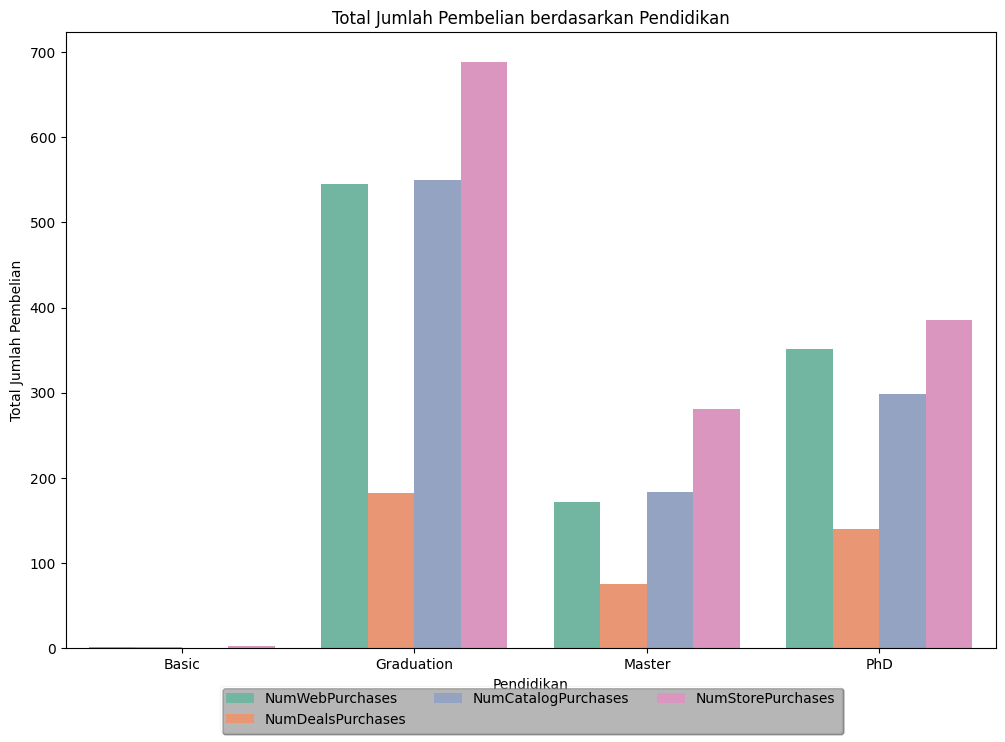

In [ ]:
# Melt DataFrame untuk membuat data dalam format yang sesuai untuk stack bar plot
result3_melted = pd.melt(result3, id_vars=['Education', 'Response'],
                         value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
                         var_name='PurchaseType', value_name='TotalAmount')

# Visualisasi stack bar plot dengan palet kustom
plt.figure(figsize=(12, 8))

custom_palette = sns.color_palette("Set2", len(result3_melted['PurchaseType'].unique()))  # Ganti "Set2" dengan palet lain jika diinginkan
ax = sns.barplot(data=result3_melted, x='Education', y='TotalAmount', hue='PurchaseType', palette=custom_palette, ci=None)
plt.title('Total Jumlah Pembelian berdasarkan Pendidikan')
plt.xlabel('Pendidikan')
plt.ylabel('Total Jumlah Pembelian')

# Tambahkan legenda di dalam plot
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)
legend.get_frame().set_alpha(0.2)


plt.show()

Dapat dilihat bahwa graduation adalah kelompok yang paling banyak menerima response, dengan pembelian terbanyak wine, dilakukan melalui store.
Rekomendasi yang kami berikan :

*   Rancang paket hadiah khusus untuk perayaan kelulusan. Paket ini dapat mencakup berbagai wine pilihan, aksesori wine, dan kartu ucapan selamat.
*   Buat paket pembelian bundle khusus beberapa jenis wine khusus untuk pembelian di store